# Caractéristiques générales du bon code

Ceci est un guide sur la construction de logiciels avec Python. Un bon logiciel est construit à partir d'une bonne conception. En disant des choses telles que du code propre, vous pensez peut-être que nous allons explorer les bonnes pratiques qui ne concernent que les détails de mise en œuvre du logiciel, au lieu de sa conception. Cependant, cette hypothèse serait fausse puisque le code n'est pas quelque chose de différent de la conception - le code est la conception.


Le code est probablement la représentation la plus détaillée de la conception. Dans les deux premiers notebbok, nous avons discuté de l'importance de structurer le code de manière cohérente, et nous avons vu des idiomes pour écrire un code plus compact et idiomatique. Il est maintenant temps de comprendre qu'un code propre , et bien plus encore - le but ultime est de rendre le code aussi robuste que possible, et de l'écrire d'une manière qui minimise les défauts ou les rend tout à fait évidents, s'ils se produisent.

Ce guide, et le suivant, se concentre sur les principes de conception à un niveau d'abstraction supérieur. Je présenterai les principes généraux du génie logiciel appliqués en Python. En particulier, pour ce guide, nous passerons en revue différents principes qui permettent une bonne conception logicielle. Des logiciels de bonne qualité doivent être construits autour de ces idées, et ils serviront d'outils de conception. Cela ne veut pas dire que tous doivent toujours être appliqués; en fait, certains d'entre eux représentent des points de vue différents (comme c'est le cas avec l'approche Design by Contract (DbC), par opposition à la programmation défensive). Certains d'entre eux dépendent du contexte et ne sont pas toujours applicables.

Un code de haute qualité est un concept qui a plusieurs dimensions. Nous pouvons penser à cela de la même manière que nous pensons aux attributs de qualité d'une architecture logicielle. Par exemple, nous voulons que notre logiciel soit sécurisé et ait de bonnes performances, fiabilité et maintenabilité, pour ne citer que quelques attributs.





## Conception par contrat

Certaines parties du logiciel sur lesquelles nous travaillons ne sont pas destinées à être appelées directement par les utilisateurs, mais plutôt par d'autres parties du code. Tel est le cas lorsque nous divisons les responsabilités de l'application en différents composants ou couches, et nous devons réfléchir à l'interaction entre eux.

Nous devons encapsuler certaines fonctionnalités derrière chaque composant et exposer une interface aux clients qui vont utiliser cette fonctionnalité, à savoir une interface de programmation d'application (API). Les fonctions, classes ou méthodes que nous écrivons pour ce composant ont une manière particulière de fonctionner sous certaines considérations qui, si elles ne sont pas respectées, feront planter notre code. Inversement, les clients appelant ce code attendent une réponse particulière, et tout échec de notre fonction à fournir cela représenterait un défaut.

C'est-à-dire que si, par exemple, nous avons une fonction qui est censée fonctionner avec une série de paramètres de type entiers, et qu'une autre fonction invoque la nôtre en passant des chaînes, il est clair qu'elle ne devrait pas fonctionner comme prévu, mais en réalité, la fonction ne devrait pas du tout s'exécuter car elle a été appelée de manière incorrecte (le client s'est trompé). Cette erreur ne doit pas passer en silence.

Bien entendu, lors de la conception d'une API, les entrées, sorties et effets secondaires attendus doivent être documentés. Mais la documentation ne peut pas imposer le comportement du logiciel au moment de l'exécution. Ces règles, ce que chaque partie du code attend pour fonctionner correctement et ce que l'appelant attend d'eux, doivent faire partie de la conception, et c'est ici que le concept de contrat entre en place.

L'idée derrière l'approche DbC est qu'au lieu de placer implicitement dans le code ce que chaque partie attend, les deux parties conviennent d'un contrat qui, s'il est violé, soulèvera une exception, indiquant clairement pourquoi il ne peut pas continuer.

Dans notre contexte, un contrat est une construction qui applique certaines règles qui doivent être respectées lors de la communication des composants logiciels. Un contrat implique principalement des préconditions et des postconditions, mais dans certains cas, des invariants et des effets secondaires sont également décrits.


* Préconditions : On peut dire que ce sont toutes les vérifications que le code effectuera avant de s'exécuter. Il vérifiera toutes les conditions qui doivent être remplies avant que la fonction puisse continuer. En général, il est implémenté en validant l'ensemble de données fourni dans les paramètres passés, mais rien ne doit nous empêcher d'exécuter toutes sortes de validations (par exemple, valider un ensemble dans une base de données, un fichier, ou une autre méthode qui a été appelée auparavant) si nous considérons que leurs effets secondaires sont éclipsés par l'importance de telles validations. Notez que cela impose une contrainte à l'appelant.

* Postconditions : A l'opposé des préconditions, ici, les validations se font après le retour de l'appel de fonction. Les validations postcondition sont exécutées pour valider ce que l'appelant attend de ce composant

* Invariants : facultativement, ce serait une bonne idée de documenter, dans la docstring d'une fonction, les invariants, les choses qui sont maintenues constantes pendant que le code de la fonction est en cours d'exécution, comme une expression de la logique de la fonction pour être correcte

*  Effets secondaires : en option, nous pouvons mentionner les effets secondaires de notre code dans la docstring.


Bien que conceptuellement, tous ces éléments fassent partie du contrat pour un composant logiciel, et c'est ce qui devrait être inclus dans la documentation d'un tel élément, seuls les deux premiers (préconditions et postconditions) doivent être appliqués à un niveau bas ( code).

 La raison pour laquelle nous concevons par contrat est que si des erreurs se produisent, elles doivent être faciles à repérer (et en remarquant si c'est la précondition ou la postcondition qui a échoué, nous trouverons le coupable beaucoup plus facilement) afin que ils peuvent être corrigés rapidement. Plus important encore, nous voulons que les parties critiques du code évitent d'être exécutées sous de mauvaises hypothèses. Cela devrait aider à marquer clairement les limites des responsabilités et des erreurs si elles se produisent, par opposition à quelque chose qui dit que cette partie de l'application échoue. Mais le code de l'appelant a fourni les mauvais arguments.

L'idée est que les préconditions lient le client (ils ont l'obligation de les respecter s'ils veulent exécuter une partie du code), tandis que les postconditions lient le composant par rapport à certaines garanties que le client peut vérifier et appliquer. De cette façon, nous peut rapidement identifier les responsabilités. Si la condition préalable échoue, nous savons que cela est dû à un défaut du client. D'un autre côté, si la vérification postcondition échoue, nous savons que le problème est dans la routine ou la classe (fournisseur) elle-même.


En particulier, concernant les préconditions, il est important de souligner qu'elles peuvent être vérifiées au moment de l'exécution, et si elles se produisent, le code qui est appelé ne doit pas être exécuté du tout (cela n'a pas de sens car ses conditions ne ne tient pas, et cela pourrait finir par empirer les choses)

## Conditions préalables

Les conditions préalables sont toutes les garanties qu'une fonction ou une méthode s'attend à recevoir pour fonctionner correctement. En termes généraux de programmation, cela signifie généralement fournir des données correctement formées, par exemple des objets initialisés, des valeurs non nulles et bien d'autres. Pour Python, en particulier, étant typé dynamiquement, cela signifie également que nous devons parfois vérifier le type exact de données fournies. Ce n'est pas exactement la même chose que la vérification de type, le genre mypy le ferait, mais vérifierait plutôt les valeurs exactes nécessaires.

Une partie de ces vérifications peut être détectée très tôt en utilisant des outils d'analyse statique, tels que mypy, que nous avons déjà présenté au guide 1, Introduction, Formatage du code et Outils, mais ces vérifications ne suffisent pas. Une fonction doit avoir une validation appropriée pour les informations qu'elle va gérer.

Maintenant, cela pose la question de savoir où placer la logique de validation, selon que l'on laisse les clients valider toutes les données avant d'appeler la fonction, ou que celui-ci valide tout ce qu'il a reçu avant d'exécuter sa propre logique. La première équivaut à une approche tolérante (parce que la fonction elle-même autorise toujours toutes les données, des données potentiellement malformées également), tandis que la seconde équivaut à une approche exigeante.

Pour les besoins de cette analyse, nous préférons une approche exigeante en ce qui concerne DbC car c'est généralement le choix le plus sûr en termes de robustesse, et généralement la pratique la plus courante dans l'industrie. Quelle que soit l'approche que nous décidons d'adopter, nous devrions gardez toujours à l'esprit le principe de non-licenciement, qui stipule que l'exécution de chaque condition préalable à une fonction doit être effectuée par une seule des deux parties du contrat, mais pas par les deux. Cela veut dire qu'on met la logique de validation sur le client, ou qu'on la laisse à la fonction elle-même, mais en aucun cas on ne doit la dupliquer (ce qui concerne aussi le principe DRY, dont nous parlerons plus loin dans ce guide)

## Postconditions

Les postconditions sont la partie du contrat qui est responsable de l'application de l'état après le retour de la méthode ou de la fonction

En supposant que la fonction ou la méthode a été appelée avec les propriétés correctes (c'est-à-dire avec ses conditions préalables remplies), les postconditions garantiront que certaines propriétés sont préservées.

L'idée est d'utiliser des postconditions pour vérifier et valider tout ce dont un client pourrait avoir besoin. Si la méthode s'exécute correctement et que les validations postconditions réussissent, alors tout client appelant ce code devrait pouvoir travailler avec l'objet renvoyé sans problème, car le contrat a été rempli.

## Contrats pythoniques

un PEP-316, nommé Programming by Contract for Python, est différé. Cela ne signifie pas que nous ne pouvons pas l'implémenter en Python car, comme présenté au début du guide, il s'agit d'un principe de conception général.

La meilleure façon d'appliquer cela est probablement d'ajouter des mécanismes de contrôle à nos méthodes, fonctions et classes, et s'ils échouent, lever une exception RuntimeError ou ValueError. Il est difficile de concevoir une règle générale pour le bon type d'exception, car cela dépendrait à peu près de l'application en particulier. Ces exceptions mentionnées précédemment sont les types d'exception les plus courants, mais si elles ne correspondent pas exactement au problème, la création d'une exception personnalisée serait le meilleur choix.

Nous aimerions également garder le code aussi isolé que possible. C'est-à-dire que le code des préconditions dans une partie, celui des postconditions dans une autre, et le noyau de la fonction séparés. Nous pourrions réaliser cette séparation en créant des fonctions plus petites, mais dans certains cas implémenter un décorateur serait une alternative intéressante

## Programmation défensive

La programmation défensive suit une approche quelque peu différente de DbC. Au lieu d'énoncer toutes les conditions qui doivent être contenues dans un contrat, qui, si elles ne sont pas remplies, déclencheront une exception et feront échouer le programme, il s'agit plutôt de rendre toutes les parties du code (objets, fonctions ou méthodes) capables de se protéger. contre les entrées invalides .

La programmation défensive est une technique qui a plusieurs aspects, et elle est particulièrement utile si elle est combinée avec d'autres principes de conception (cela signifie que le fait qu'elle suive une philosophie différente de DbC ne signifie pas qu'il s'agit de l'un ou l'autre autre - cela pourrait signifier qu'ils pourraient se compléter).

Les idées principales sur le sujet de la programmation défensive sont de savoir comment gérer les erreurs pour les scénarios auxquels on pourrait s'attendre et comment gérer les erreurs qui ne devraient jamais se produire (lorsque des conditions impossibles se produisent). Le premier tombera dans les procédures de gestion des erreurs, tandis que le second sera le cas pour les assertions. Les deux sujets sont explorés dans les sections suivantes

## La gestion des erreurs

Dans nos programmes, nous recourons à des procédures de gestion des erreurs pour les situations que nous anticipons comme susceptibles de provoquer des erreurs. C'est généralement le cas pour la saisie des données.

L'idée derrière la gestion des erreurs est de répondre gracieusement à ces erreurs attendues dans une tentative de poursuivre l'exécution de notre programme ou de décider d'échouer si l'erreur s'avère insurmontable.

Il existe différentes approches par lesquelles nous pouvons gérer les erreurs sur nos programmes, mais toutes ne sont pas toujours applicables. Certaines de ces approches sont les suivantes :

* Substitution de valeur 
* erreurs logging
*  Gestion des exceptions

Dans les deux sections suivantes, nous nous concentrerons sur la substitution de valeur et la gestion des exceptions, car ces formes de gestion des erreurs fournissent une analyse plus intéressante. erreurs logging est une pratique complémentaire (et bonne ; nous devrions toujours enregistrer les erreurs), mais la plupart du temps, nous n'enregistrons que lorsqu'il n'y a rien d'autre à faire, donc les autres méthodes offrent des alternatives plus intéressantes

## Substitution de valeur

Dans certains scénarios, lorsqu'il y a une erreur et qu'il existe un risque que le logiciel produise une valeur incorrecte ou échoue complètement, nous pourrions être en mesure de remplacer le résultat par une autre valeur plus sûre. Nous appelons cette substitution de valeur, puisque nous remplaçons, en fait, le résultat erroné réel par une valeur qui doit être considérée comme non perturbatrice (ce pourrait être une valeur par défaut, une constante bien connue, une valeur sentinelle, ou simplement quelque chose qui n'affecte pas du tout le résultat, comme renvoyer zéro dans un cas où le résultat est destiné à être appliqué à une somme).

Cependant, la substitution de valeur n'est pas toujours possible. Cette stratégie doit être soigneusement choisie pour les cas où la valeur de substitution est une option sûre. Prendre cette décision est un compromis entre robustesse et exactitude. Un logiciel est robuste lorsqu'il ne tombe pas en panne, même en présence d'un scénario erroné. Mais ce n'est pas correct non plus.

Cela peut ne pas être acceptable pour certains types de logiciels. Si l'application est critique ou si les données traitées sont trop sensibles, ce n'est pas une option, car nous ne pouvons pas nous permettre de fournir aux utilisateurs (ou à d'autres parties de l'application) des résultats erronés. Dans ces cas, nous optons pour l'exactitude, plutôt que de laisser le programme exploser lorsqu'il donne de mauvais résultats.

Une version légèrement différente et plus sûre de cette décision consiste à utiliser des valeurs par défaut pour les données qui ne sont pas fournies. Cela peut être le cas pour des parties du code qui peuvent fonctionner avec un comportement par défaut, par exemple, des valeurs par défaut pour des variables d'environnement qui ne sont pas définies, pour des entrées manquantes dans des fichiers de configuration, ou pour des paramètres de fonctions

Nous pouvons trouver des exemples de Python prenant en charge cela à travers différentes méthodes de son API, par exemple, les dictionnaires ont une méthode get, dont le deuxième paramètre (facultatif) vous permet d'indiquer une valeur par défaut

In [1]:
configuration = {"dbport": 5432}
configuration.get("dbhost", "localhost")

'localhost'

In [2]:
configuration.get("dbport")

5432

Les variables d'environnement ont une API similaire

In [4]:
import os
print(os.getenv("DBHOST"))

None


In [5]:
os.getenv("DPORT", 5432)

5432

Dans les deux exemples précédents, si le deuxième paramètre n'est pas fourni, None sera renvoyé car c'est la valeur par défaut avec laquelle ces fonctions sont définies. Nous pouvons également définir des valeurs par défaut pour les paramètres de nos propres fonctions :

In [6]:
def connect_database(host="localhost", port=5432):   
  logger.info("connecting to database server at %s:%i", host, port)

En général, le remplacement des paramètres manquants par des valeurs par défaut est acceptable, mais la substitution de données erronées par des valeurs proches légales est plus dangereuse et peut masquer certaines erreurs. Tenir compte de ce critère au moment de décider de cette approche

## Gestion des exception

En présence de données d'entrée incorrectes ou manquantes, il est parfois possible de corriger la situation avec quelques exemples, tels que ceux mentionnés dans la section précédente. Dans d'autres cas, cependant, il vaut mieux empêcher le programme de continuer à s'exécuter avec des données erronées que de le laisser calculer sous des hypothèses erronées. Dans ces cas, échouer et informer l'appelant que quelque chose ne va pas est une bonne approche, et c'est le cas pour une condition préalable qui a été violée, comme nous l'avons vu dans DbC.

Néanmoins, des données d'entrée erronées ne sont pas le seul moyen possible par lequel une fonction peut mal tourner. Après tout, les fonctions ne se limitent pas à transmettre des données ; ils ont également des effets secondaires et se connectent à des composants externes.

Il est possible qu'une erreur dans un appel de fonction soit due à un problème sur l'un de ces composants externes, et non dans notre fonction elle-même. Si tel est le cas, notre fonction devrait le communiquer correctement. Cela facilitera le débogage. La fonction doit clairement et sans ambiguïté informer le reste de l'application des erreurs qui ne peuvent être ignorées afin qu'elles puissent être corrigées en conséquence.

Le mécanisme pour y parvenir est une exception. Il est important de souligner que c'est pour cela que les exceptions doivent être utilisées : annoncer clairement une situation exceptionnelle et ne pas modifier le flux du programme selon la logique métier.

Si le code essaie d'utiliser des exceptions pour gérer les scénarios attendus ou la logique métier, le flux du programme deviendra plus difficile à lire. Cela conduira à une situation où les exceptions sont utilisées comme une sorte d'instruction go-to, qui (pour aggraver les choses) pourrait s'étendre sur plusieurs niveaux sur la pile d'appels (jusqu'aux fonctions d'appelant), violant l'encapsulation de la logique dans son niveau d'abstraction. Le cas pourrait empirer si ces blocs except mélangent la logique métier avec des cas vraiment exceptionnels contre lesquels le code essaie de se défendre ; dans ce cas, il sera plus difficile de faire la distinction entre la logique de base que nous devons maintenir et les erreurs à traiter.

    N'utilisez pas d'exceptions comme mécanisme de référence pour la logique métier.
    Lever des exceptions lorsqu'il y a quelque chose qui ne va pas avec le code dont les appelants doivent être conscients.


Ce dernier concept est important ; les exceptions consistent généralement à informer l'appelant de quelque chose qui ne va pas. Cela signifie que les exceptions doivent être utilisées avec précaution car elles affaiblissent l'encapsulation. Plus une fonction a d'exceptions, plus la fonction appelante devra anticiper, donc connaître la fonction qu'elle appelle. Et si une fonction lève trop d'exceptions, cela signifie qu'elle n'est pas si contextuelle, car chaque fois que nous voulons l'invoquer, nous devrons garder à l'esprit tous ses effets secondaires possibles.

Cela peut être utilisé comme une heuristique pour dire quand une fonction n'est pas sufsamment cohésive et a trop de responsabilités. S'il soulève trop d'exceptions, cela peut être le signe qu'il doit être décomposé en plusieurs plus petites.

Voici quelques recommandations relatives aux exceptions en Python



## Gérer les exceptions au bon niveau d'abstraction

Les exceptions font également partie des fonctions principales qui font une chose, et une seule chose. L'exception que la fonction gère (ou soulève) doit être cohérente avec la logique qui y est encapsulée.

Dans l'exemple suivant, nous pouvons voir ce que nous entendons par mélanger différents niveaux d'abstractions. Imaginez un objet qui agit comme un transport pour certaines données dans notre application. Il se connecte à un composant externe où les données vont être envoyées lors du décodage. Dans la liste suivante, nous allons nous concentrer sur la méthode Deliver_event

In [1]:
import logging
import time

logger = logging.getLogger(__name__)


class Connector:
    """Abstract the connection to a database."""

    def connect(self):
        """Connect to a data source."""
        return self

    @staticmethod
    def send(data):
        return data


class Event:
    def __init__(self, payload):
        self._payload = payload

    def decode(self):
        return f"decoded {self._payload}"


class DataTransport:
    """An example of an object handling exceptions of different levels."""

    _RETRY_BACKOFF: int = 5
    _RETRY_TIMES: int = 3

    def __init__(self, connector: Connector) -> None:
        self._connector = connector
        self.connection = None

    def deliver_event(self, event: Event):
        try:
            self.connect()
            data = event.decode()
            self.send(data)
        except ConnectionError as e:
            logger.info("connection error detected: %s", e)
            raise
        except ValueError as e:
            logger.error("%r contains incorrect data: %s", event, e)
            raise

    def connect(self):
        for _ in range(self._RETRY_TIMES):
            try:
                self.connection = self._connector.connect()
            except ConnectionError as e:
                logger.info(
                    "%s: attempting new connection in %is",
                    e,
                    self._RETRY_BACKOFF,
                )
                time.sleep(self._RETRY_BACKOFF)
            else:
                return self.connection
        raise ConnectionError(
            f"Couldn't connect after {self._RETRY_TIMES} times"
        )

    def send(self, data: bytes):
        return self.connection.send(data)

Pour notre analyse, zoomons et concentrons-nous sur la façon dont la méthode Deliver_event() gère les exceptions.

Qu'est-ce que ValueError a à voir avec ConnectionError ? Pas beaucoup. En examinant ces deux types d'erreurs très différents, nous pouvons avoir une idée de la façon dont les responsabilités doivent être réparties.

ConnectionError doit être géré dans la méthode connect. Cela permet une séparation claire des comportements. Par exemple, si cette méthode doit prendre en charge les nouvelles tentatives, la gestion de cette exception serait un moyen de le faire.

Inversement, ValueError appartient à la méthode de décodage de l'événement. Avec cette nouvelle implémentation (illustrée dans l'exemple suivant), cette méthode n'a besoin d'attraper aucune exception - les exceptions dont nous nous préoccupions auparavant sont soit gérées par des méthodes internes, soit délibérément laissées à lever.

Nous devrions séparer ces fragments en différentes méthodes ou fonctions. Pour la gestion des connexions, une petite fonction devrait suffire. Cette fonction sera chargée d'essayer d'établir la connexion, de détecter les exceptions (si elles se produisent) et de les enregistrer en conséquence

In [ ]:
logger = logging.getLogger(__name__)


def connect_with_retry(
    connector: Connector, retry_n_times: int, retry_backoff: int = 5
):
    """Tries to establish the connection of <connector> retrying
    <retry_n_times>, and waiting <retry_backoff> seconds between attempts.
    If it can connect, returns the connection object.
    If it's not possible to connect after the retries have been exhausted, raises ``ConnectionError``.
    :param connector:         An object with a ``.connect()`` method.
    :param retry_n_times int: The number of times to try to call
                                ``connector.connect()``.
    :param retry_backoff int: The time lapse between retry calls.
    """
    for _ in range(retry_n_times):
        try:
            return connector.connect()
        except ConnectionError as e:
            logger.info(
                "%s: attempting new connection in %is", e, retry_backoff
            )
            time.sleep(retry_backoff)
    exc = ConnectionError(f"Couldn't connect after {retry_n_times} times")
    logger.exception(exc)

Ensuite, nous appellerons cette fonction dans notre méthode. Quant à l'exception ValueError sur l'événement, nous pourrions la séparer avec un nouvel objet et faire la composition, mais pour ce cas limité, ce serait exagéré, donc il suffirait de déplacer la logique vers une méthode distincte. Avec ces deux considérations en place, la nouvelle version de la méthode semble beaucoup plus compacte et plus facile à lire

In [ ]:
class DataTransport:
    """An example of an object that separates the exception handling by
    abstraction levels.
    """

    _RETRY_BACKOFF: int = 5
    _RETRY_TIMES: int = 3

    def __init__(self, connector: Connector) -> None:
        self._connector = connector
        self.connection = None

    def deliver_event(self, event: Event):
        self.connection = connect_with_retry(
            self._connector, self._RETRY_TIMES, self._RETRY_BACKOFF
        )
        self.send(event)

    def send(self, event: Event):
        try:
            return self.connection.send(event.decode())
        except ValueError as e:
            logger.error("%r contains incorrect data: %s", event, e)
            raise

Voyez maintenant comment la séparation des classes d'exception délimite également une séparation des responsabilités. Dans le premier exemple montré, tout était mélangé, et il n'y avait pas de séparation claire des préoccupations. Ensuite, nous avons décidé que la connexion était une préoccupation pour elle-même, donc dans l'exemple suivant, la fonction connect_with_retry a été créée et ConnectionError était gérée dans le cadre de cette fonction, si nous devions modifier cette fonction (comme nous l'avions fait). D'un autre côté, la ValueError ne faisait pas partie de cette même logique, elle a donc été laissée dans la méthode d'envoi à laquelle elle appartient.

Les exceptions ont un sens. Pour cette raison, il est important de gérer chaque type d'exception à son bon niveau d'abstraction (c'est-à-dire en fonction de la couche de notre application à laquelle ils appartiennent). Mais ils peuvent aussi parfois contenir des informations importantes. Et puisque ces informations peuvent être sensibles, nous ne voulons pas qu'elles tombent entre de mauvaises mains, donc dans la section suivante, nous discuterons des implications de sécurité des exceptions.

## Ne pas exposer les retraçages aux utilisateurs finaux

Il s'agit d'une considération de sécurité. Lorsqu'il s'agit d'exceptions, il peut être acceptable de les laisser se propager si l'erreur est trop importante, et peut-être même de laisser le programme échouer si c'est la décision pour ce scénario particulier et que l'exactitude a été privilégiée par rapport à la robustesse.

Lorsqu'une exception signale un problème, il est important de se connecter avec autant de détails que possible (y compris les informations de traçabilité, le message et tout ce que nous pouvons rassembler) afin que le problème puisse être corrigé efficacement. Dans le même temps, nous voulons inclure autant de détails que possible pour nous-mêmes - nous ne voulons pas que tout cela devienne visible pour les utilisateurs.

En Python, les traces d'exceptions contiennent des informations de débogage très riches et utiles. Malheureusement, ces informations sont également très utiles pour les attaquants ou les utilisateurs malveillants qui veulent tenter de nuire à l'application, sans compter que la fuite représenterait une divulgation d'informations importante, mettant en péril la propriété intellectuelle de votre organisation (car des parties du code seront exposé)

Si vous choisissez de laisser les exceptions se propager, assurez-vous de ne divulguer aucune information sensible. De plus, si vous devez informer les utilisateurs d'un problème, choisissez des messages génériques (tels que Quelque chose s'est mal passé ou Page non trouvée). Il s'agit d'une technique courante utilisée dans les applications Web qui affichent des messages d'information génériques lorsqu'une erreur HTTP se produit.


## Eviter d'avoir un bloc except vide.

Cela a même été appelé l'anti-modèle Python le plus diabolique (REAL 01). S'il est bon d'anticiper et de défendre nos programmes contre certaines erreurs, être trop défensif peut entraîner des problèmes encore pires. En particulier, le seul problème d'être trop défensif est qu'il y a un bloc except vide qui passe silencieusement sans rien faire.

Python est si flexible qu'il nous permet d'écrire du code qui peut être défectueux et pourtant, ne générera pas d'erreur, comme ceci

    try:
        process_data()
    except:
        pass

Le problème avec ceci est qu'il n'échouera jamais, même quand il le devrait. Il est également non Pythonic si vous vous souvenez du Zen de Python que les erreurs ne devraient jamais passer en silence.

    Configurez votre environnement d'intégration continue (en utilisant des
    outils tels que ceux explorés dans le guide 1, Introduction, Formatage du code et Outils) pour générer automatiquement des rapports sur les blocs d'exception vides


En cas d'exception, ce bloc de code n'échouera pas, ce qui pourrait être ce que nous voulions en premier lieu. Mais que faire s'il y a un défaut? Il peut se produire un échec réel lors de l'exécution de la fonction process_data(), et nous aimerions savoir s'il y a une erreur dans notre logique afin de pouvoir la corriger. L'écriture de blocs comme celui-ci masquera les problèmes, rendant les choses plus difficiles à maintenir.


Il y a deux alternatives :

* Attraper une exception plus spécifique (pas trop large, comme une Exception). En fait, certains outils de linting et IDE vous avertiront dans certains cas lorsque le code gère une exception trop large. 

* Effectuez une gestion réelle des erreurs sur le bloc except

La meilleure chose à faire serait d'appliquer les deux recommandations. La gestion d'une exception plus spécifique (par exemple, AttributeError ou KeyError) rendra le programme plus facile à gérer car le lecteur saura à quoi s'attendre et pourra se faire une idée du pourquoi. Cela laissera également d'autres exceptions libres d'être levées, et si cela se produit, cela signifie probablement un bogue, seulement cette fois, il peut être découvert.

La gestion de l'exception elle-même peut signifier plusieurs choses. Dans sa forme la plus simple, il pourrait s'agir simplement de consigner l'exception (assurez-vous d'utiliser logger.exception ou logger.error pour fournir le contexte complet de ce qui s'est passé). D'autres alternatives pourraient être de renvoyer une valeur par défaut (substitution, uniquement dans ce cas après avoir détecté une erreur, pas avant de la provoquer), ou de lever une exception différente

    Si vous choisissez de lever une exception différente,
    incluez l'exception d'origine qui a causé le problème (voir la section suivante)

Une autre raison d'éviter d'avoir un bloc except vide (en utilisant pass) est son caractère implicite : il ne dit pas aux lecteurs du code que nous nous attendons à ce que cette exception soit ignorée. Une façon plus explicite de le faire serait d'utiliser la fonction contextlib.suppress, qui peut accepter toutes les exceptions comme arguments à ignorer, et elle peut être utilisée comme gestionnaire de contexte.

Dans notre exemple, cela pourrait ressembler à ceci

    import contextlib
    with contextlib.suppress(KeyError):
        process_data()

Encore une fois, comme dans le cas précédent, essayez d'éviter de passer l'exception générale à ce gestionnaire de contexte, car l'effet sera le même

## Inclure l'exception d'origine

Dans le cadre de notre logique de gestion des erreurs, nous pourrions décider d'en créer un autre, et peut-être même changer son message. Si tel est le cas, il est recommandé d'inclure l'exception d'origine qui a conduit à cette exception.

Nous pouvons utiliser la syntaxe de relance <e> de <original_exception> (PEP-3134). Lors de l'utilisation de cette construction, le retraçage d'origine sera intégré dans la nouvelle exception et l'exception d'origine sera définie dans l'attribut __cause__ de l'exception résultante.

Par exemple, si nous souhaitons envelopper les exceptions par défaut avec des exceptions personnalisées en interne dans notre projet, nous pouvons toujours le faire tout en incluant des informations sur l'exception racine

In [ ]:
class InternalDataError(Exception):
    """An exception with the data of our domain problem."""


def process(data_dictionary, record_id):
    try:
        return data_dictionary[record_id]
    except KeyError as e:
        raise InternalDataError("Record not present") from e

    Utilisez toujours la syntaxe raise <e> from <o> lorsque vous modifiez le type de l'exception

L'utilisation de cette syntaxe fera en sorte que les traces contiennent plus d'informations sur l'exception ou l'erreur qui vient de se produire, ce qui aidera considérablement lors du débogage

## Utiliser des assertions en Python

Les assertions doivent être utilisées pour des situations qui ne devraient jamais se produire, donc l'expression sur l'instruction assert doit signifier une condition impossible. Si cette condition se produit, cela signifie qu'il y a un défaut dans le logiciel.

Contrairement à l'approche de gestion des erreurs, il existe des situations dans lesquelles nous ne voulons pas que notre programme poursuive son exécution si une erreur particulière s'est produite. C'est parce que, dans certains cas, l'erreur ne peut pas être surmontée, et notre programme ne peut pas corriger son cours d'exécution (ou d'auto-guérison), il est donc préférable d'échouer rapidement, et de laisser l'erreur être remarquée, afin qu'elle puisse être corrigée avec la prochaine mise à jour de la version.

L'idée d'utiliser des assertions est d'empêcher le programme de causer d'autres dommages si un tel scénario invalide est présenté. Parfois, il est préférable d'arrêter et de laisser le programme planter plutôt que de le laisser continuer le traitement sous de mauvaises hypothèses.

Par définition, une assertion est une condition booléenne dans le code qui doit être vraie pour que le programme soit correct. Si le programme échoue à cause d'une AssertionError, cela signifie qu'un défaut vient d'être découvert.

Pour cette raison, les assertions ne doivent pas être mélangées avec la logique métier, ou utilisées comme mécanismes de contrôle de flux pour le logiciel. L'exemple suivant est une mauvaise idée

In [ ]:
try:    
  assert condition.holds(), "Condition is not satisfied"
  except AssertionError:
        alternative_procedure()

    N'interceptez pas l'exception AssertionError car cela pourrait être
    déroutant pour les lecteurs du code. Si vous vous attendez à ce qu'une partie de votre code lève une exception, essayez d'en utiliser une plus spécifique

Le conseil précédent d'attraper l'AssertionError va dans le sens de ne pas laisser votre programme échouer en silence. Mais cela pourrait échouer gracieusement. Ainsi, au lieu de laisser l'application se bloquer, vous pouvez intercepter l'AssertionError et afficher un message d'erreur générique, tout en enregistrant tous les détails de l'erreur interne sur la plate-forme de journalisation de votre entreprise. Il ne s'agit pas exactement de savoir s'il faut ou non intercepter cette exception, mais que les erreurs d'assertion sont une source précieuse d'informations qui vous aideront à améliorer la qualité de votre logiciel.

Assurez-vous que le programme se termine lorsqu'une assertion échoue. Cela signifie que des assertions sont généralement insérées dans le code pour identifier les parties erronées du programme. Il y a une tendance dans de nombreux langages de programmation à penser que les assertions peuvent être supprimées lorsque le programme est en cours d'exécution, mais cela va à l'encontre de son objectif, car leur but est de nous informer précisément des parties du programme qui doivent être corrigées.

En Python, en particulier, l'exécution avec l'indicateur -O supprimera les instructions d'assertion, mais cela est déconseillé pour les raisons susmentionnées.

    N'exécutez pas vos programmes de production avec python –O… 
    car vous aimeriez profiter des assertions du code pour corriger les défauts.

Incluez un message d'erreur descriptif dans la déclaration d'assertion et enregistrez les erreurs pour vous assurer que vous pouvez correctement déboguer et corriger le problème plus tard.

Une autre raison importante pour laquelle le code précédent est une mauvaise idée est qu'en plus d'attraper AssertionError, l'instruction dans l'assertion est un appel de fonction. Les appels de fonction peuvent avoir des effets secondaires, et ils ne sont pas toujours reproductibles (nous ne savons pas si un nouvel appel de condition.holds() produira le même résultat). De plus, si nous arrêtons le débogueur à cette ligne, nous pourrions ne pas être en mesure de voir facilement le résultat qui provoque l'erreur, et, encore une fois, même si nous appelons à nouveau cette fonction, nous ne savons pas si c'était la valeur incriminée.

Une meilleure alternative nécessite quelques lignes de code supplémentaires, mais fournit des informations plus utiles:

    result = condition.holds()
    assert result > 0, f"Error with {result}"
.
    
    Lorsque vous utilisez des assertions, essayez d'éviter d'utiliser des
    appels de fonction directement et écrivez l'expression en termes de variables locales.

Quelle est la relation entre les assertions et la gestion des exceptions ? Certains pourraient se demander si les assertions sont sans objet, à la lumière de la gestion des exceptions. Pourquoi voudriez-vous affirmer une condition si nous pouvons la vérifier avec une instruction if et lever une exception ? Il y a une différence subtile, cependant. En général, les exceptions servent à gérer des situations inattendues par rapport à la logique métier que notre programme voudra prendre en compte, tandis que les assertions sont comme des mécanismes d'auto-vérification mis dans le code, pour valider (affirmer) son exactitude.

Pour cette raison, la levée d'exceptions sera beaucoup plus courante que les instructions assert. Les utilisations typiques de l'assertion sont des situations où un algorithme maintient une logique invariante qui doit être conservée à tout moment : dans ce cas, vous voudrez peut-être affirmer pour l'invariant. Si cela est cassé à un moment donné, cela signifie que l'algorithme est erroné ou mal implémenté.

Nous avons exploré la programmation défensive en Python et certains sujets connexes concernant la gestion des exceptions. Maintenant, nous passons au prochain grand sujet, car la section suivante traite de la séparation des préoccupations.

## Séparation des préoccupations

Il s'agit d'un principe de conception qui s'applique à plusieurs niveaux. Il ne s'agit pas seulement de la conception de bas niveau (code), mais c'est également pertinent à un niveau d'abstraction plus élevé, donc cela reviendra plus tard lorsque nous parlerons d'architecture.

Différentes responsabilités doivent aller dans différents composants, couches ou modules de l'application. Chaque partie du programme ne devrait être responsable que d'une partie de la fonctionnalité (ce que nous appelons ses préoccupations) et ne devrait rien savoir du reste.

L'objectif de séparer les problèmes dans le logiciel est d'améliorer la maintenabilité en minimisant les effets d'entraînement. Un effet d'entraînement signifie la propagation d'un changement dans le logiciel à partir d'un point de départ. Cela peut être le cas d'une erreur ou d'une exception déclenchant une chaîne d'autres exceptions, provoquant des pannes qui se traduiront par un défaut sur une partie distante de l'application. Il se peut également que nous ayons à modifier beaucoup de code dispersé dans plusieurs parties de la base de code, à la suite d'un simple changement dans la définition d'une fonction.

De toute évidence, nous ne voulons pas que ces scénarios se produisent. Le logiciel doit être facile à changer. Si nous devons modifier ou refactoriser une partie du code, cela doit avoir un impact minimal sur le reste de l'application, et le moyen d'y parvenir est de procéder à une encapsulation appropriée.

De la même manière, nous souhaitons que toutes les erreurs potentielles soient contenues afin qu'elles ne causent pas de dommages majeurs.

Ce concept est lié au principe DbC dans le sens où chaque préoccupation peut être imposée par un contrat. Lorsqu'un contrat est violé et qu'une exception est levée à la suite d'une telle violation, nous savons quelle partie du programme a échoué et quelles responsabilités n'ont pas été respectées.

Malgré cette similitude, la séparation des préoccupations va plus loin. Nous pensons normalement aux contrats entre fonctions, méthodes ou classes, et bien que cela s'applique également aux responsabilités qui doivent être séparées, l'idée de la séparation des préoccupations s'applique également aux modules Python, aux packages et à tout composant logiciel.

## Cohésion et couplage

Ce sont des concepts importants pour une bonne conception de logiciel

D'une part, la cohésion signifie que les objets doivent avoir un but petit et bien défini, et qu'ils doivent en faire le moins possible. Il suit une philosophie similaire à celle des commandes Unix qui ne font qu'une seule chose et la font bien. Plus nos objets sont cohérents, plus ils deviennent utiles et réutilisables, améliorant ainsi notre conception.

D'autre part, le couplage fait référence à l'idée selon laquelle deux objets ou plus dépendent les uns des autres. Cette dépendance pose une limite. Si deux parties du code (objets ou méthodes) sont trop dépendantes l'une de l'autre, elles entraînent des conséquences indésirables.

*  Pas de réutilisation de code : Si une fonction dépend trop d'un objet particulier, ou prend trop de paramètres, elle est couplée à cet objet, ce qui signifie qu'il sera vraiment diffcile d'utiliser cette fonction dans un contexte différent (pour le faire , il va falloir trouver un paramètre adapté qui respecte une interface très contraignante).

* Effets d'entraînement : Les changements dans l'une des deux parties auront certainement un impact sur l'autre, car ils sont trop proches.

* Faible niveau d'abstraction : lorsque deux les fonctions sont si étroitement liées qu'il est difficile de les voir comme des préoccupations différentes résolvant des problèmes à différents niveaux d'abstraction.

      Règle empirique : un logiciel bien défini permettra d'obtenir une cohésion élevée et un faible couplage

## Acronymes pour vivre

Dans cette section, nous passerons en revue certains principes qui donnent de bonnes idées de conception. Il s'agit de se rapporter rapidement aux bonnes pratiques logicielles par des acronymes faciles à retenir, fonctionnant comme une sorte de règle mnémotechnique. Si vous gardez ces mots en tête, vous pourrez les associer plus facilement aux bonnes pratiques et trouver la bonne idée derrière une ligne de code particulière que vous regardez sera plus rapide.

Il ne s'agit en aucun cas de définitions formelles ou académiques, mais plutôt d'idées empiriques issues d'années de travail dans l'industrie du logiciel. Certains d'entre eux apparaissent dans des livres, car ils ont été inventés par des auteurs importants (voir les références pour les étudier plus en détail), et d'autres ont probablement leurs racines dans des articles de blog, des articles ou des conférences.



### DRY/OAOO

Les idées de Don't Repeat Yourself (DRY) et Once and Only Once (OAOO) sont étroitement liées, elles ont donc été incluses ensemble ici. Ils sont explicites et vous devez éviter à tout prix les doublons.

Les choses du code, les connaissances, ne doivent être définies qu'une seule fois et en un seul endroit. Lorsque vous devez modifier le code, il ne devrait y avoir qu'un seul emplacement légitime à modifier. Ne pas le faire est le signe d'un système mal conçu.

La duplication de code est un problème qui impacte directement la maintenabilité. Il est très indésirable d'avoir une duplication de code en raison de ses nombreuses conséquences négatives

* C'est un sujet aux erreurs : lorsqu'une logique est répétée plusieurs fois dans le code et que cela doit changer, cela signifie que nous dépendons de la correction efficace de toutes les instances avec cette logique, sans en oublier aucune, car dans ce cas, il y aura un bug.

*  C'est cher : Lié au point précédent, faire un changement à plusieurs endroits prend beaucoup plus de temps (effort de développement et de test) que s'il n'était défini qu'une seule fois. Cela ralentira l'équipe.

* Ce n'est pas fiable : également lié au premier point, lorsque plusieurs endroits doivent être modifiés pour un seul changement de contexte, vous comptez sur la personne qui a écrit le code pour se souvenir de toutes les instances où la modification doit être effectuée. Il n'y a pas de source unique de vérité.

La duplication est souvent causée par l'ignorance (ou l'oubli) que le code représente la connaissance. En donnant un sens à certaines parties du code, nous identifions et étiquetons ces connaissances.

Voyons ce que cela signifie avec un exemple. Imaginons que, dans un centre d'études, les étudiants soient classés selon les critères suivants : 11 points par examen réussi, moins cinq points par examen échoué et moins deux par an dans l'établissement. Ce qui suit n'est pas du code réel, mais juste une représentation de la façon dont cela pourrait être dispersé dans une base de code réelle

In [ ]:
def process_students_list(students):
      # do some processing...    
      students_ranking = sorted(        
          students, key=lambda s: s.passed * 11 - s.failed * 5 - s.years * 2    
          )    
      # more processing    
      for student in students_ranking:        
        print(            
            "Name: {0}, Score: {1}".format(                
                student.name,                
                (student.passed * 11 - student.failed * 5 - student.years * 2),            
                )        
            )

Remarquez comment le lambda, qui est dans la clé de la fonction triée, représente une connaissance valide du problème de domaine, mais il ne le reflète pas (il n'a pas de nom, d'emplacement approprié et légitime, il y a aucune signification attribuée à ce code, rien). Ce manque de sens dans le code conduit à la duplication que l'on trouve lors de l'impression du score en listant le râtelage.

Nous devrions refléter notre connaissance de notre problème de domaine dans notre code, et notre code sera alors moins susceptible de souffrir de duplication et sera plus facile à comprendre

In [ ]:
def score_for_student(student):    
  return student.passed * 11 - student.failed * 5 - student.years * 2


def process_students_list(students):
      # do some processing...    
      students_ranking = sorted(students, key=score_for_student)    
      # more processing    
      for student in students_ranking:        
        print(            
            "Name: {0}, Score: {1}".format(                
                student.name,  score_for_student(student)            
                )        
            )

Un avertissement juste : il s'agit simplement d'une analyse de l'un des traits de la duplication de code. En réalité, il existe plus de cas, de types et de taxonomies de duplication de code. Des chapitres entiers pourraient être consacrés à ce sujet, mais ici nous nous concentrons sur un aspect particulier pour clarifier l'idée derrière l'acronyme.

Dans cet exemple, nous avons adopté ce qui est probablement l'approche la plus simple pour éliminer les doublons : créer une fonction. Selon les cas, la meilleure solution serait différente. Dans certains cas, il peut y avoir un tout nouvel objet qui doit être créé (peut-être qu'une abstraction entière manquait). Dans d'autres cas, nous pouvons éliminer les doublons avec un gestionnaire de contexte. Les itérateurs ou générateurs peuvent également aider à éviter les répétitions dans le code, et les décorateurs, aideront également.

Malheureusement, il n'y a pas de règle générale ou de modèle pour vous dire quelles fonctionnalités de Python sont les plus appropriées pour traiter la duplication de code, mais j'espère qu'après avoir vu les exemples de ce guide et comment les éléments de Python sont utilisés, le lecteur pourra développer sa propre intuition.

### YAGNI

YAGNI (abréviation de You Ain't Gonna Need It) est une idée que vous voudrez peut-être garder à l'esprit très souvent lors de la rédaction d'une solution si vous ne voulez pas la sur-concevoir

Nous voulons pouvoir modifier facilement nos programmes, nous voulons donc les rendre à l'épreuve du temps. Dans cette optique, de nombreux développeurs pensent qu'ils doivent anticiper toutes les exigences futures et créer des solutions très complexes, et ainsi créer des abstractions difficiles à lire, à maintenir et à comprendre. Quelque temps plus tard, il s'avère que ces exigences anticipées n'apparaissent pas, ou elles le font mais d'une manière différente (surprise !), et le code original qui était censé gérer précisément cela ne fonctionne pas.

Le problème est que maintenant il est encore plus difficile de refactoriser et d'étendre nos programmes. Ce qui s'est passé, c'est que la solution d'origine ne gérait pas correctement les exigences d'origine, pas plus que les exigences actuelles, simplement parce que c'est la mauvaise abstraction.

Avoir un logiciel maintenable ne consiste pas à anticiper les besoins futurs (ne faites pas de futurologie !). Il s'agit d'écrire un logiciel qui ne répond qu'aux exigences actuelles de manière à ce qu'il soit possible (et facile) de le modifier ultérieurement. En d'autres termes, lors de la conception, assurez-vous que vos décisions ne vous arrêtent pas, et que vous pourrez continuer à construire, mais ne construisez pas plus que ce qui est nécessaire.

Il est généralement tentant de ne pas suivre cette idée dans certains cas où nous connaissons des principes qui, selon nous, pourraient s'appliquer ou nous faire gagner du temps. Par exemple, plus loin dans le guide, nous passerons en revue les modèles de conception, qui sont des solutions courantes pour des situations typiques de conception orientée objet. S'il est important d'étudier les modèles de conception, nous devons refuser la tentation de les appliquer prématurément car cela pourrait tomber dans une violation du principe YAGNI


Par exemple, imaginez que vous créez une classe pour encapsuler le comportement d'un composant. Vous savez que c'est nécessaire, mais vous pensez ensuite que d'autres exigences (et similaires) viendront à l'avenir, il pourrait donc être tentant de créer une classe de base (pour définir une interface avec les méthodes qui doivent être implémentées), et puis faites de la classe que vous venez de créer une sous-classe qui implémente cette interface. Ce serait faux pour plusieurs raisons. Tout d'abord, tout ce dont vous avez besoin maintenant est la classe qui a été créée en premier lieu (investir plus de temps dans la généralisation excessive d'une solution dont nous ne savons pas avoir besoin n'est pas une bonne façon de gérer nos ressources). Et puis, cette classe de base est biaisée par les exigences actuelles, donc ce ne sera probablement pas la bonne abstraction.

 La meilleure approche serait d'écrire uniquement ce qui est nécessaire maintenant d'une manière qui n'empêche pas d'autres améliorations. Si, plus tard, plus d'exigences arrivent, nous pouvons penser à créer une classe de base, faire abstraction de certaines méthodes, et peut-être découvrirons-nous un modèle de conception qui a émergé pour notre solution. C'est aussi la façon dont la conception orientée objet est censée fonctionner : de bas en haut. 
 
 Enfin, je voulais souligner que YAGNI est une idée qui s'applique également à l'architecture logicielle (pas seulement au code détaillé)

## KIS

KIS (pour Keep It Simple) se rapporte beaucoup au point précédent. Lorsque vous concevez un composant logiciel, évitez de le sur-concevoir. Demandez-vous si votre solution est la solution minimale qui correspond au problème.

Implémentez une fonctionnalité minimale qui résout correctement le problème et ne complique pas votre solution plus que nécessaire. N'oubliez pas que plus la conception est simple, plus elle sera facile à entretenir.

Ce principe de conception est une idée que nous voudrons garder à l'esprit à tous les niveaux d'abstraction, qu'il s'agisse d'une conception de haut niveau ou d'une ligne de code particulière.

À un niveau élevé, pensez aux composants que nous créons. Avons-nous vraiment besoin de tous ? Ce module nécessite-t-il réellement d'être totalement extensible en ce moment ? Insistez sur la dernière partie : nous voulons peut-être rendre ce composant extensible, mais ce n'est pas le bon moment, ou ce n'est pas approprié de le faire parce que nous n'avons toujours pas assez d'informations pour créer les abstractions appropriées, et essayer de trouver les interfaces génériques à ce stade ne feront qu'aggraver les problèmes.

En termes de code, rester simple signifie généralement utiliser la plus petite structure de données qui correspond au problème. Vous le trouverez probablement dans la bibliothèque standard.

Parfois, nous pouvons trop compliquer le code, créant plus de fonctions ou de méthodes que nécessaire. La classe suivante crée un espace de noms à partir d'un ensemble d'arguments de mots clés qui ont été fournis, mais elle a une interface de code plutôt compliquée.

In [2]:
class ComplicatedNamespace:
    """An convoluted example of initializing an object with some properties.
    >>> cn = ComplicatedNamespace.init_with_data(
    ...    id_=42, user="root", location="127.0.0.1", extra="excluded"
    ... )
    >>> cn.id_, cn.user, cn.location
    (42, 'root', '127.0.0.1')
    >>> hasattr(cn, "extra")
    False
    """

    ACCEPTED_VALUES = ("id_", "user", "location")

    @classmethod
    def init_with_data(cls, **data):
        instance = cls()
        for key, value in data.items():
            if key in cls.ACCEPTED_VALUES:
                setattr(instance, key, value)
        return instance

Avoir une méthode de classe supplémentaire pour initialiser l'objet ne semble pas nécessaire. Ensuite, l'itération et l'appel à setattr à l'intérieur rendent les choses encore plus étranges, et l'interface qui est présentée à l'utilisateur n'est pas très claire

In [3]:
cn = ComplicatedNamespace.init_with_data(     
    id_=42, user="root", location="127.0.0.1", extra="excluded" 
    )
cn.id_, cn.user, cn.location

(42, 'root', '127.0.0.1')

In [4]:
hasattr(cn, "extra")

False

L'utilisateur doit connaître l'existence de cette autre méthode, ce qui n'est pas pratique. Il serait préférable de rester simple et d'initialiser simplement l'objet comme nous initialisons n'importe quel autre objet en Python (après tout, il existe une méthode pour cela) avec la méthode __init__

In [ ]:
class Namespace:
    """Create an object from keyword arguments.
    >>> cn = Namespace(
    ...    id_=42, user="root", location="127.0.0.1", extra="excluded"
    ... )
    >>> cn.id_, cn.user, cn.location
    (42, 'root', '127.0.0.1')
    >>> hasattr(cn, "extra")
    False
    """

    ACCEPTED_VALUES = ("id_", "user", "location")

    def __init__(self, **data):
        for attr_name, attr_value in data.items():
            if attr_name in self.ACCEPTED_VALUES:
                setattr(self, attr_name, attr_value)

Il existe de nombreux scénarios en Python dans lesquels nous aimerions garder notre code simple. L'un d'eux concerne quelque chose que nous avons déjà exploré : la duplication de code. Une façon courante d'abstraire du code en Python consiste à utiliser des décorateurs (que nous verrons plus tard, Utiliser des décorateurs pour améliorer notre code). Mais que se passe-t-il si nous essayons d'éviter la duplication d'une petite section, disons trois lignes de code ? Dans ce cas, écrire le décorateur prendrait probablement plus de lignes et poserait plus de problèmes pour les simples lignes dupliquées que nous essayons de résoudre. Dans ce cas, faites preuve de bon sens et soyez pragmatique. Acceptez qu'une petite quantité de duplication puisse être meilleure qu'une fonction compliquée (c'est-à-dire, bien sûr, à moins que vous ne trouviez un moyen encore plus simple de supprimer la duplication et de garder le code simple !)

Dans le cadre de la simplicité du code, je recommanderais d'éviter les fonctionnalités avancées de Python, telles que les méta-classes (ou tout ce qui concerne la méta-programmation en général), car non seulement ces fonctionnalités sont à peine nécessaires (il existe des justifications très spéciales pour leur utilisation !), mais aussi, ils rendent le code beaucoup plus compliqué à lire, et plus difficile à maintenir

### EAFP/LBYL
EAFP (Easier to Ask Forgiveness than Permission) signifie plus facile de demander pardon que la permission, tandis que LBYL (Look Before You Leap) signifie regarder avant de sauter.

L'idée de l'EAFP est que nous écrivons notre code pour qu'il effectue une action directement, puis nous nous occupons des conséquences plus tard au cas où cela ne fonctionnerait pas. En règle générale, cela signifie essayer d'exécuter du code, en s'attendant à ce qu'il fonctionne, mais en interceptant une exception si ce n'est pas le cas, puis en gérant le code correctif sur le bloc except.

C'est le contraire de LBYL. Comme son nom l'indique, dans l'approche regarder avant de sauter, nous vérifions d'abord ce que nous sommes sur le point d'utiliser. Par exemple, nous pourrions vouloir vérifier si un fichier est disponible avant d'essayer de l'utiliser

    if os.path.exists(filename):
        with open(filename) as f:
            ...

La version EAFP du code précédent ressemblerait à ceci :

    try:    
      with open(filename) as f:
          ...
    except FileNotFoundError as e:
        logger.error(e)

Si vous venez d'autres langages, tels que C, qui n'ont pas d'exceptions, alors il est logique que l'approche LBYL soit plus utile. Et dans d'autres langages tels que C++, il y a un certain découragement envers l'utilisation d'exceptions en raison de considérations de performances, mais cela n'est généralement pas vrai en Python.


Des cas particuliers peuvent bien sûr s'appliquer, mais la plupart du temps, vous trouverez la version EAFP plus révélatrice d'intention. Le code écrit de cette manière serait plus facile à lire, car il va directement à la tâche nécessaire au lieu de vérifier préventivement les conditions. En d'autres termes, dans le dernier exemple, vous verrez une partie du code qui essaie d'ouvrir un fichier puis de le traiter. Si le fichier n'existe pas, alors nous traitons ce cas. Dans le premier exemple, nous verrons une fonction vérifiant si un fichier existe, puis essayant de faire quelque chose. Vous pourriez soutenir que cela est également clair, mais nous n'en sommes pas sûrs. Peut-être que le fichier demandé est différent ou est une fonction qui appartient à une couche différente du programme, ou un reste, etc. La deuxième approche est moins sujette aux erreurs lorsque vous regardez le code au premier coup d'œil.

Vous pouvez appliquer les deux idées car elles ont du sens dans votre code particulier, mais en général, un code écrit à la manière d'EAFP serait plus facile à choisir au premier coup d'œil, donc en cas de doute, je vous recommande de choisir cette variante



## Héritage en Python

Dans la conception de logiciels orientés objet, il y a souvent des discussions sur la façon de résoudre certains problèmes en utilisant les idées principales du paradigme (polymorphisme, héritage et encapsulation)


L'héritage est probablement l'idée la plus couramment utilisée. Les développeurs commencent souvent par créer une hiérarchie de classes avec les classes dont ils auront besoin et décident des méthodes que chacun doit implémenter.


Bien que l'héritage soit un concept puissant, il comporte ses dangers. Le principal est que chaque fois que nous étendons une classe de base, nous en créons une nouvelle qui est étroitement couplée avec le parent. Comme nous l'avons déjà évoqué, le couplage est l'une des choses que nous voulons réduire au minimum lors de la conception d'un logiciel.


L'un des principaux scénarios auxquels les développeurs associent l'héritage est la réutilisation du code. Bien que nous devrions toujours adopter la réutilisation du code, ce n'est pas une bonne idée de forcer notre conception à utiliser l'héritage pour réutiliser le code simplement parce que nous obtenons gratuitement les méthodes de la classe parent. La bonne façon de réutiliser le code est d'avoir des objets hautement cohérents qui peuvent être facilement composés et qui pourraient fonctionner dans plusieurs contextes

### Quand l'héritage est une bonne décision

Nous devons être prudents lors de la création d'une classe dérivée car il s'agit d'une arme à double tranchant. nous les transférons tous dans une nouvelle classe, ce qui signifie que nous pourrions placer trop de fonctionnalités dans une nouvelle définition.

Lors de la création d'une nouvelle sous-classe, nous devons nous demander si elle va réellement utiliser toutes les méthodes dont elle vient d'hériter, comme une heuristique pour voir si la classe est correctement définie. Si à la place, nous découvrons que nous n'avons pas besoin de la plupart des méthodes, et devons les écraser ou les remplacer, il s'agit d'une erreur de conception qui peut être causée par un certain nombre de raisons : 

*  La superclasse est vaguement définie et contient trop de responsabilités, au lieu d'une interface bien définie

*  La sous-classe n'est pas une spécialisation appropriée de la superclasse qu'elle essaie d'étendre

Un bon cas d'utilisation de l'héritage est le type de situation où vous avez une classe qui définit certains composants avec son comportement qui sont définis par l'interface de cette classe (ses méthodes et attributs publics), et vous devez ensuite vous spécialiser cette classe afin de créer des objets qui font la même chose mais avec quelque chose d'autre ajouté, ou avec certaines parties particulières de son comportement modifiées.

Vous pouvez trouver des exemples de bonnes utilisations de l'héritage dans la bibliothèque standard Python elle-même. Par exemple, dans le package http.server (https://docs.python.org/3/library/http.server.html#http.server.BaseHTTPRequestHandler), nous pouvons trouver une classe de base telle que BaseHTTPRequestHandler et des sous-classes comme SimpleHTTPRequestHandler, qui étend celui-ci en ajoutant ou en modifiant une partie de son interface de base


En parlant de définition d'interface, c'est une autre bonne utilisation de l'héritage. Lorsque nous voulons imposer l'interface de certains objets, nous pouvons créer une classe de base abstraite qui n'implémente pas le comportement lui-même, mais définit simplement l'interface - chaque classe qui étend celle-ci devra les implémenter pour être un bon sous-type

Enfin, un autre bon exemple d'héritage est celui des exceptions. Nous pouvons voir que l'exception standard en Python dérive de Exception. C'est ce qui vous permet d'avoir une clause générique telle que except Exception, qui interceptera toutes les erreurs possibles. Le point important est le point conceptuel ; ce sont des classes dérivées d'Exception car ce sont des exceptions plus spécifiques. Cela fonctionne également dans les bibliothèques bien connues telles que les requêtes, par exemple, dans lesquelles une HTTPError est une RequestException, qui, à son tour, est une IOError

## Anti-patterns  pour l'héritage

Si la section précédente devait être résumée en un seul mot, ce serait spécialisation. L'utilisation correcte de l'héritage consiste à spécialiser les objets et à créer des abstractions plus détaillées à partir de celles de base

La classe parent (ou de base) fait partie de la définition publique de la nouvelle classe dérivée. En effet, les méthodes héritées feront partie de l'interface de cette nouvelle classe. Pour cette raison, lorsque nous lisons les méthodes publiques d'une classe, elles doivent être cohérentes avec ce que la classe parente définit.

Par exemple, si nous voyons qu'une classe dérivée de BaseHTTPRequestHandler implémente une méthode nommée handle(), cela aurait du sens car elle écrase l'un des parents. S'il y avait une autre méthode dont le nom se rapporte à une action qui a à voir avec une requête HTTP, alors nous pourrions aussi penser qu'elle est correctement placée (mais nous ne penserions pas que si nous trouvions quelque chose appelé process_purchase() sur cette classe)


L'illustration précédente peut sembler évidente, mais c'est quelque chose qui arrive très souvent, surtout lorsque les développeurs essaient d'utiliser l'héritage dans le seul but de réutiliser du code. Dans l'exemple suivant, nous verrons une situation typique qui représente un anti-modèle courant en Python — il y a un problème de domaine qui doit être représenté, et une structure de données appropriée est conçue pour ce problème, mais au lieu de créer un objet qui utilise une telle structure de données, l'objet devient la structure de données elle-même.

Voyons plus concrètement ces problèmes à travers un exemple. Imaginons que nous ayons un système de gestion des assurances, avec un module chargé d'appliquer les polices aux différents clients. Nous devons garder en mémoire un ensemble de clients en cours de traitement afin d'appliquer ces modifications avant un traitement ultérieur ou une persistance. Les opérations de base dont nous avons besoin sont de stocker un nouveau client avec ses enregistrements sous forme de données satellite, d'appliquer une modification à une politique ou de modifier certaines des données, pour n'en citer que quelques-unes. Nous devons également prendre en charge une opération par lots. C'est-à-dire que lorsque quelque chose sur la politique elle-même change (celle que ce module traite actuellement), nous devons appliquer ces changements globalement aux clients sur la transaction en cours.

En termes de structure de données dont nous avons besoin, nous réalisons que l'accès à l'enregistrement d'un client particulier en temps constant est un trait agréable. Par conséquent, quelque chose comme policy_transaction[customer_id] ressemble à une belle interface. À partir de là, nous pourrions penser qu'un objet indiciel est une bonne idée, et plus loin, nous pourrions nous laisser emporter en pensant que l'objet dont nous avons besoin est un dictionnaire

In [7]:
import collections
from datetime import datetime

class TransactionalPolicy(collections.UserDict):
    """Example of an incorrect use of inheritance."""

    def change_in_policy(self, customer_id, **new_policy_data):
        self[customer_id].update(**new_policy_data)

Avec ce code, nous pouvons obtenir des informations sur une politique pour un client par son identifiant

In [8]:
policy = TransactionalPolicy({     
    "client001": {         
        "fee": 1000.0,        
         "expiration_date": datetime(2020, 1, 3),     
         } 
         })


policy["client001"]

{'expiration_date': datetime.datetime(2020, 1, 3, 0, 0), 'fee': 1000.0}

In [10]:
policy.change_in_policy("client001", expiration_date=datetime(2020, 1, 4))
policy["client001"]

{'expiration_date': datetime.datetime(2020, 1, 4, 0, 0), 'fee': 1000.0}

Bien sûr, nous avons obtenu l'interface que nous voulions en premier lieu, mais à quel prix ? Maintenant, cette classe a beaucoup de comportement supplémentaire en exécutant des méthodes qui n'étaient pas nécessaires

In [12]:
#dir(policy)

Il y a (au moins) deux problèmes majeurs avec cette conception. D'une part, la hiérarchie est erronée. Créer une nouvelle classe à partir d'une classe de base signifie conceptuellement qu'il s'agit d'une version plus spécifique de la classe qu'elle étend (d'où son nom). Comment se fait-il qu'une TransactionalPolicy soit un dictionnaire ? Est-ce que ça a du sens? N'oubliez pas que cela fait partie de l'interface publique de l'objet, donc les utilisateurs verront cette classe et sa hiérarchie et remarqueront une spécialisation si étrange ainsi que ses méthodes publiques.

Cela nous amène au deuxième problème : le couplage. L'interface de la politique transactionnelle comprend désormais toutes les méthodes d'un dictionnaire. Une politique transactionnelle a-t-elle vraiment besoin de méthodes telles que pop() ou items() ? Cependant, ils sont là. Ils sont également publics, de sorte que tout utilisateur de cette interface est autorisé à les appeler, quel que soit l'effet secondaire indésirable qu'ils peuvent entraîner. Plus sur ce point, nous ne gagnons pas vraiment beaucoup à étendre un dictionnaire. La seule méthode qu'il doit réellement mettre à jour pour tous les clients affectés par un changement dans la politique actuelle (change_in_policy()) n'est pas sur la classe de base, nous devrons donc la définir nous-mêmes de toute façon.

Il s'agit d'un problème de mélange d'objets d'implémentation avec des objets. Un dictionnaire est un objet d'implémentation, une structure de données, adapté à certains types d'opérations, et avec un compromis comme toutes les structures de données. Une politique transactionnelle doit représenter quelque chose dans le problème du domaine, une entité qui fait partie du problème que nous essayons de résoudre

      Ne mélangez pas les structures de données d'implémentation avec les
      classes de domaine métier dans la même hiérarchie


Des hiérarchies comme celle-ci sont incorrectes, et ce n'est pas parce que nous obtenons quelques méthodes magiques d'une classe de base (pour rendre l'objet subscriptible en étendant un dictionnaire) de créer une telle extension. Les classes d'implémentation doivent être étendues uniquement lors de la création d'autres classes d'implémentation plus spécifiques. En d'autres termes, étendez un dictionnaire si vous souhaitez créer un autre dictionnaire (plus spécique ou légèrement modifié). La même règle s'applique aux classes du problème de domaine

La bonne solution ici est d'utiliser la composition. TransactionalPolicy n'est pas un dictionnaire, il utilise un dictionnaire. Il doit stocker un dictionnaire dans un attribut privé et implémenter __getitem__() en faisant appel à ce dictionnaire, puis en implémentant uniquement le reste de la méthode publique dont il a besoin

In [ ]:
class TransactionalPolicy:
    """Example refactored to use composition."""

    def __init__(self, policy_data, **extra_data):
        self._data = {**policy_data, **extra_data}

    def change_in_policy(self, customer_id, **new_policy_data):
        self._data[customer_id].update(**new_policy_data)

    def __getitem__(self, customer_id):
        return self._data[customer_id]

    def __len__(self):
        return len(self._data)

Cette méthode est non seulement correcte sur le plan conceptuel, mais aussi plus extensible. Si la structure de données sous-jacente (qui, pour l'instant, est un dictionnaire) est modifiée à l'avenir, les appelants de cet objet ne seront pas affectés, tant que l'interface est maintenue. Cela réduit le couplage, minimise les effets d'entraînement, permet une meilleure refactorisation (les tests unitaires ne doivent pas être modifiés) et rend le code plus maintenable

## Héritage multiple en Python

Python prend en charge l'héritage multiple. Comme l'héritage, lorsqu'il est mal utilisé, entraîne des problèmes de conception, vous pouvez également vous attendre à ce que l'héritage multiple génère également des problèmes encore plus importants lorsqu'il n'est pas correctement implémenté.

L'héritage multiple est donc une arme à double tranchant. Cela peut aussi être très bénéfique dans certains cas. Juste pour être clair, il n'y a rien de mal avec l'héritage multiple - le seul problème qu'il a est que lorsqu'il n'est pas implémenté correctement, il multipliera les problèmes

L'héritage multiple est une solution parfaitement valable lorsqu'il est utilisé correctement, et cela ouvre de nouveaux modèles (tels que le modèle d'adaptateur)

L'une des applications les plus puissantes de l'héritage multiple est peut-être celle qui permet la création de mixins. Avant d'explorer les mixins, nous devons comprendre comment fonctionne l'héritage multiple et comment les méthodes sont résolues dans une hiérarchie complexe

## Method Resolution Order (MRO)

Certaines personnes n'aiment pas l'héritage multiple en raison des contraintes qu'il a dans d'autres langages de programmation, par exemple, le problème du diamant. Lorsqu'une classe s'étend à partir de deux ou plusieurs classes, et que toutes ces classes s'étendent également à partir d'autres classes de base, les classes inférieures auront plusieurs façons de résoudre les méthodes provenant des classes de niveau supérieur. La question est : laquelle de ces implémentations est utilisée ?

Considérez le diagramme suivant, qui a une structure à héritage multiple. La classe de niveau supérieur a un attribut class et implémente la méthode __str__. Pensez à l'une des classes concrètes, par exemple, ConcreteModuleA12 - elle s'étend de BaseModule1 et BaseModule2, et chacune d'entre elles prendra l'implémentation de __str__ à partir de BaseModule. Laquelle de ces deux méthodes sera celle de ConcreteModuleA12 ?

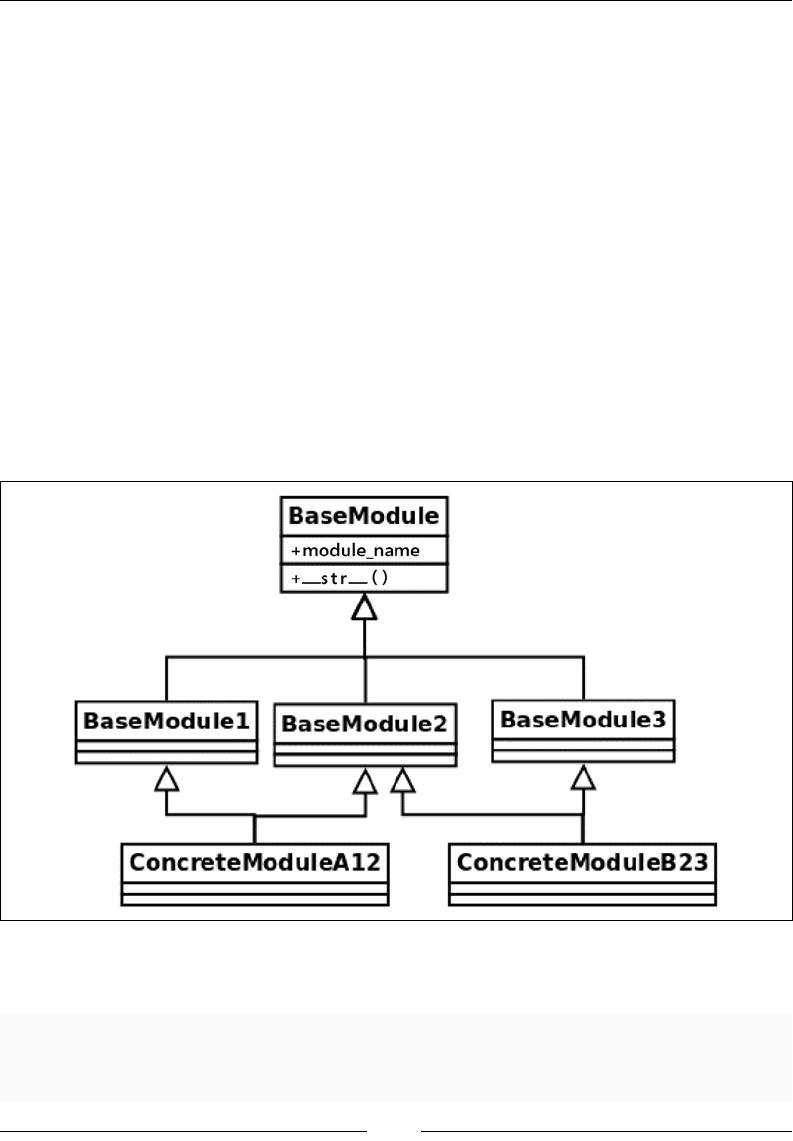

Avec la valeur de l'attribut class, cela deviendra évident :

In [14]:
class BaseModule:
    module_name = "top"

    def __init__(self, module_name):
        self.name = module_name

    def __str__(self):
        return f"{self.module_name}:{self.name}"


class BaseModule1(BaseModule):
    module_name = "module-1"


class BaseModule2(BaseModule):
    module_name = "module-2"


class BaseModule3(BaseModule):
    module_name = "module-3"


class ConcreteModuleA12(BaseModule1, BaseModule2):
    """Extend 1 & 2
    >>> str(ConcreteModuleA12('name'))
    'module-1:name'
    """


class ConcreteModuleB23(BaseModule2, BaseModule3):
    """Extend 2 & 3
    >>> str(ConcreteModuleB23("test"))
    'module-2:test'
    """

Maintenant, testons ceci pour voir quelle méthode est appelée

In [15]:
str(ConcreteModuleA12("test"))

'module-1:test'

Il n'y a pas de collision. Python résout ce problème en utilisant un algorithme appelé linéarisation C3 ou MRO, qui définit une manière déterministe d'appeler les méthodes.

En fait, on peut précisément demander à la classe son ordre de résolution

In [16]:
[cls.__name__ for cls in ConcreteModuleA12.mro()]

['ConcreteModuleA12', 'BaseModule1', 'BaseModule2', 'BaseModule', 'object']

Savoir comment la méthode va être résolue dans une hiérarchie peut être utilisé à notre avantage lors de la conception de classes car nous pouvons utiliser des mixins

## Mixins


Un mixin est une classe de base qui encapsule un comportement commun dans le but de réutiliser le code. Typiquement, une classe mixin n'est pas utile en soi, et étendre cette classe seule ne fonctionnera certainement pas, car la plupart du temps, cela dépend de méthodes et de propriétés définies dans d'autres classes. L'idée est d'utiliser des classes mixin avec d'autres, par héritage multiple, afin que les méthodes ou propriétés utilisées sur le mixin soient disponibles

Imaginez que nous ayons un simple analyseur qui prend une chaîne et fournit une itération dessus par ses valeurs séparées par des tirets (-)

In [17]:
class BaseTokenizer:
    """
    >>> tk = BaseTokenizer("28a2320b-fd3f-4627-9792-a2b38e3c46b0")
    >>> list(tk)
    ['28a2320b', 'fd3f', '4627', '9792', 'a2b38e3c46b0']
    """

    def __init__(self, str_token):
        self.str_token = str_token

    def __iter__(self):
        yield from self.str_token.split("-")

tk = BaseTokenizer("28a2320b-fd3f-4627-9792-a2b38e3c46b0")
list(tk)

['28a2320b', 'fd3f', '4627', '9792', 'a2b38e3c46b0']

Mais maintenant, nous voulons que les valeurs soient envoyées en majuscules, sans altérer la classe de base. Pour cet exemple simple, nous pourrions simplement créer une nouvelle classe, mais imaginez que de nombreuses classes s'étendent déjà à partir de BaseTokenizer et que nous ne voulons pas toutes les remplacer. Nous pouvons mélanger une nouvelle classe dans la hiérarchie qui gère cette transformation

In [19]:
class UpperIterableMixin:
    def __iter__(self):
        return map(str.upper, super().__iter__())


class Tokenizer(UpperIterableMixin, BaseTokenizer):
    """
    >>> tk = Tokenizer("28a2320b-fd3f-4627-9792-a2b38e3c46b0")
    >>> list(tk)
    ['28A2320B', 'F
    """

In [20]:
tk = Tokenizer("28a2320b-fd3f-4627-9792-a2b38e3c46b0")
list(tk)

['28A2320B', 'FD3F', '4627', '9792', 'A2B38E3C46B0']

La nouvelle classe Tokenizer est vraiment simple. Il n'a besoin d'aucun code car il tire parti du mixin. Ce type de mixin agit comme une sorte de décorateur. Sur la base de ce que nous venons de voir, Tokenizer prendra __iter__ du mixin, et celui-ci, à son tour, délègue à la classe suivante sur la ligne (en appelant super()), qui est BaseTokenizer, mais il convertit ses valeurs en majuscules, créant ainsi l'effet désiré.

Comme nous avons discuté de l'héritage en Python, nous avons vu des sujets tels que la cohésion et le couplage qui sont importants pour la conception de notre logiciel. Ces concepts apparaissent à plusieurs reprises dans la conception de logiciels, et ils peuvent également être analysés à partir du prisme des fonctions et de leurs arguments, que nous explorons dans la section suivante.

## Arguments dans les fonctions et les méthodes

En Python, les fonctions peuvent être définies pour recevoir des arguments de plusieurs manières différentes, et ces arguments peuvent également être fournis par les appelants de plusieurs manières.

Il existe également un ensemble de pratiques à l'échelle de l'industrie pour la définition des interfaces en génie logiciel qui sont étroitement liées à la définition des arguments dans les fonctions.

Dans cette section, nous allons d'abord explorer la mécanique des arguments dans les fonctions Python, puis passer en revue les principes généraux du génie logiciel qui se rapportent aux bonnes pratiques concernant ce sujet pour enfin relier les deux concepts.

### Comment fonctionnent les arguments de fonction en Python

Tout d'abord, examinons les particularités de la façon dont les arguments sont transmis aux fonctions en Python.

En comprenant d'abord les possibilités qu'offre Python pour la gestion des paramètres, nous pourrons assimiler plus facilement les règles générales, et l'idée est qu'après avoir fait cela, nous pouvons facilement tirer des conclusions sur ce que sont les bons modèles ou idiomes lors de la gestion des arguments. Ensuite, nous pouvons identifier dans quels scénarios l'approche Pythonic est la bonne, et dans quels cas nous pourrions abuser des fonctionnalités du langage

### Comment les arguments sont copiés dans les fonctions

La première règle en Python est que tous les arguments sont passés par une valeur. Toujours. Cela signifie que lors de la transmission de valeurs aux fonctions, elles sont affectées aux variables sur la définition de signature de la fonction pour être ensuite utilisées sur celle-ci.

Vous remarquerez qu'une fonction peut ou non muter les paramètres qu'elle reçoit, selon leur type. Si nous passons des objets mutables et que le corps de la fonction modifie cela, alors bien sûr, nous avons l'effet secondaire qu'ils auront été modifiés au moment où la fonction reviendra.



In [21]:
def function(argument):
  
  argument += " in function"
  print(argument)

immutable = "hello"

function(immutable)

hello in function


In [24]:
mutable = list("hello")
function(mutable)

['h', 'e', 'l', 'l', 'o', ' ', 'i', 'n', ' ', 'f', 'u', 'n', 'c', 't', 'i', 'o', 'n']


In [25]:
mutable

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'i',
 'n',
 ' ',
 'f',
 'u',
 'n',
 'c',
 't',
 'i',
 'o',
 'n']

Cela peut ressembler à une incohérence, mais ce n'est pas le cas. Lorsque nous passons le premier argument, une chaîne, celui-ci est affecté à l'argument de la fonction. Étant donné que les objets chaîne sont immuables, une instruction telle que argument += <expression> créera en fait le nouvel objet, argument + <expression>, et le réaffectera à l'argument. À ce stade, un argument n'est qu'une variable locale à l'intérieur de la portée de la fonction et n'a rien à voir avec l'original dans l'appelant

D'un autre côté, lorsque nous passons list, qui est un objet mutable, alors cette instruction a une signification différente (elle équivaut à appeler .extend() sur cette liste). Cet opérateur agit en modifiant la liste en place sur une variable qui contient une référence à l'objet liste d'origine, le modifiant ainsi. Ce qui s'est passé dans ce deuxième cas, c'est que la référence de la liste a été passée par une valeur à la fonction. Mais puisqu'il s'agit d'une référence, il mute l'objet de liste d'origine, nous voyons donc la mutation une fois la fonction terminée. C'est à peu près équivalent à ça

In [26]:
a = list(range(5))
b = a  # the function call is doing something like this
b.append(99)
a

[0, 1, 2, 3, 4, 99]

Nous devons être prudents lorsque nous traitons des objets mutables, car cela peut entraîner des effets secondaires inattendus. À moins que vous ne soyez absolument sûr qu'il est correct de manipuler des arguments mutables de cette manière, je recommanderais de l'éviter et d'opter pour des alternatives sans ces problèmes.

Les arguments en Python peuvent être passés par position, comme dans de nombreux autres langages de programmation, mais aussi par mot-clé. Cela signifie que nous pouvons dire explicitement à la fonction quelles valeurs nous voulons pour quels paramètres. La seule mise en garde est qu'après qu'un paramètre est passé par un mot-clé, le reste qui suit doit également être passé de cette façon, sinon, SyntaxError sera levée.


### Nombre variable d'arguments

Python, ainsi que d'autres langages, a des fonctions et des constructions intégrées qui peuvent prendre un nombre variable d'arguments. Considérons, par exemple, les fonctions d'interpolation de chaîne (que ce soit en utilisant l'opérateur % ou la méthode de format pour les chaînes), qui suivent une structure similaire à la fonction printf en C, un premier paramètre de position avec le format de chaîne, suivi de n'importe quel nombre d'arguments qui seront placés sur les marqueurs de cette chaîne de formatage.

En plus de tirer parti de ces fonctions disponibles en Python, nous pouvons également créer les nôtres, qui fonctionneront de la même manière. Dans cette section, nous couvrirons les principes de base des fonctions avec un nombre variable d'arguments, ainsi que quelques recommandations, afin que dans la section suivante, nous puissions explorer comment utiliser ces fonctionnalités à notre avantage pour traiter des problèmes courants, des problèmes, et les contraintes que les fonctions pourraient avoir si elles ont trop d'arguments.

Pour un nombre variable d'arguments positionnels, le symbole étoile (*) est utilisé, précédant le nom de la variable qui contient ces arguments. Cela fonctionne grâce au mécanisme d'emballage de Python. Disons qu'il existe une fonction qui prend trois arguments de position. Dans une partie du code, nous avons commodément les arguments que nous voulons passer à la fonction à l'intérieur d'une liste, dans le même ordre que celui attendu par la fonction.

Au lieu de les passer un par un par la position (c'est-à-dire list[0] au premier élément, list[1] au second, et ainsi de suite), ce qui ne serait vraiment pas Python, nous pouvons utiliser le packaging mécanisme et les passer tous ensemble dans une seule instruction

In [27]:
def f(first, second, third):
  print(first)
  print(second)
  print(third)

l = [1, 2, 3]
f(*l)

1
2
3


La bonne chose à propos du mécanisme d'emballage est qu'il fonctionne également dans l'autre sens. Si on veut extraire les valeurs d'une liste à des variables, par leur position respective, on peut les affecter comme ceci

In [28]:
a, b, c = [1, 2, 3]

a

1

Un déballage partiel est également possible. Disons que nous sommes juste intéressés par les premières valeurs d'une séquence (cela peut être une liste, un tuple ou autre chose), et après un certain temps, nous voulons juste que le reste reste ensemble. Nous pouvons affecter les variables dont nous avons besoin et laisser le reste dans une liste empaquetée. L'ordre dans lequel nous déballons n'est pas limité. S'il n'y a rien à placer dans l'une des sous-sections décompressées, le résultat sera une liste vide. Essayez les exemples suivants sur un terminal Python et explorez également le fonctionnement du déballage avec les générateurs

In [30]:
def show(e, rest):
  print("Element: {0} - Rest: {1}".format(e, rest))

first, *rest = [1, 2, 3, 4, 5]
show(first, rest)

Element: 1 - Rest: [2, 3, 4, 5]


L'une des meilleures utilisations pour décompresser les variables peut être trouvée dans l'itération. Lorsque nous devons itérer sur une séquence d'éléments et que chaque élément est, à son tour, une séquence, c'est une bonne idée de décompresser en même temps que chaque élément est itéré. Pour voir un exemple de cela en action, nous allons prétendre que nous avons une fonction qui reçoit une liste de lignes de base de données et qu'elle est chargée de créer des utilisateurs à partir de ces données. La première implémentation prend les valeurs pour construire l'utilisateur à partir de la position de chaque colonne dans la ligne, ce qui n'est pas du tout idiomatique. La deuxième implémentation utilise le déballage lors de l'itération

In [31]:
from dataclasses import dataclass


USERS = [(i, f"first_name_{i}", f"last_name_{i}") for i in range(1_000)]


@dataclass
class User:
    user_id: int
    first_name: str
    last_name: str


def bad_users_from_rows(dbrows) -> list:
    """A bad case (non-pythonic) of creating ``User``s from DB rows."""
    return [User(row[0], row[1], row[2]) for row in dbrows]


def users_from_rows(dbrows) -> list:
    """Create ``User``s from DB rows."""
    return [
        User(user_id, first_name, last_name)
        for (user_id, first_name, last_name) in dbrows
    ]

Notez que la deuxième version est beaucoup plus facile à lire. Dans la première version de la fonction (bad_users_from_rows), nous avons des données exprimées sous la forme row[0], row[1] et row[2], ce qui ne nous dit rien sur ce qu'elles sont. D'autre part, les variables telles que user_id, first_name et last_name parlent d'elles-mêmes.

Nous pourrions également utiliser l'opérateur étoile pour passer tous les paramètres de position du tuple lors de la construction de l'objet User
    
    [User(*row) for row in dbrows]

Nous pouvons tirer parti de ce type de fonctionnalité à notre avantage lors de la conception de nos propres fonctions. Un exemple que nous pouvons trouver dans la bibliothèque standard réside dans la fonction max, qui est définie comme suit

    max(...)    
      max(iterable, *[, default=obj, key=func]) -> value    
      max(arg1, arg2, *args, *[, key=func]) -> value        
      
      With a single iterable argument, return its biggest item. The
      default keyword-only argument specifies an object to return if    
      the provided iterable is empty.    
      With two or more arguments, return the largest argument.
  

Il existe une notation similaire, avec deux étoiles (**) pour les arguments de mot-clé. Si nous avons un dictionnaire et que nous le passons avec une double étoile à une fonction, il choisira les clés comme nom du paramètre et passera la valeur de cette clé comme valeur de ce paramètre dans cette fonction

    function(**{"key": "value"})

Inversement, si nous définissons une fonction avec un paramètre commençant par deux symboles étoiles, l'inverse se produira : les paramètres fournis par les mots-clés seront regroupés dans un dictionnaire.

    

In [32]:
def function(**kwargs):     
      print(kwargs)

function(key="value")

{'key': 'value'}


Cette fonctionnalité de Python est vraiment puissante car elle nous permet de choisir dynamiquement les valeurs que nous voulons transmettre à une fonction. Cependant, abuser de cette fonctionnalité et en faire un usage excessif rendra le code plus difficile à comprendre.

Lorsque nous définissons une fonction comme dans l'exemple précédent, sur laquelle l'un de ses paramètres a une double étoile, ce qui signifie que des arguments de mots-clés arbitraires sont autorisés, Python les placera dans un dictionnaire auquel nous pouvons accéder à notre discrétion. De la fonction défnie précédemment, l'argument kwargs est un dictionnaire. Une bonne recommandation est de ne pas utiliser ce dictionnaire pour en extraire des valeurs particulières

A savoir, ne cherchez pas des clés particulières du dictionnaire. Au lieu de cela, extrayez ces arguments directement sur la définition de la fonction

par exemple, au lieu de faire quelque chose comme ceci :

In [ ]:
def function(**kwargs):  # wrong    
  timeout = kwargs.get("timeout", DEFAULT_TIMEOUT)

Laissez Python effectuer le déballage et définissez l'argument par défaut à la signature :

In [ ]:
def function(timeout=DEFAULT_TIMEOUT, **kwargs):
  # better    ...

Dans cet exemple, le délai d'expiration n'est pas strictement limité aux mots-clés. Nous verrons comment créer des arguments uniquement par mot-clé dans quelques sections, mais l'idée qui devrait prévaloir est de ne pas manipuler le dictionnaire kwargs, et à la place d'exécuter un déballage approprié au niveau de la signature. Avant de plonger dans les arguments uniquement par mot-clé, commençons avec ceux qui sont d'abord positionnels

## Paramètres de position uniquement

Comme nous l'avons déjà vu, les arguments positionnels (variables ou non) sont ceux qui sont d'abord fournis aux fonctions en Python. Les valeurs de ces arguments sont interprétées en fonction de la position où elles sont fournies à la fonction, ce qui signifie qu'elles sont attribuées respectivement aux paramètres dans la définition de la fonction.

Si nous n'utilisons aucune syntaxe spéciale lors de la définition des arguments de la fonction, par défaut, ils peuvent être passés par position ou par mot-clé. Par exemple, dans la fonction suivante, tous les appels à la fonction sont équivalents

In [58]:
def my_function(x, y):
  print("x={0}, y={1}".format(x,y))


In [55]:
my_function(1, 2)

x=1, y=2


In [56]:
my_function(x=1, y=2)

x=1, y=2


In [61]:
my_function(1, y=2)

x=1, y=2


Cela signifie que, dans le premier cas, nous passons les valeurs 1 et 2, et par leur position, elles sont affectées aux paramètres x et y, respectivement. Avec cette syntaxe, rien ne nous empêche de passer les mêmes arguments avec leur mot-clé (même dans l'ordre inverse), s'il le fallait (par exemple, pour être plus explicite). La seule contrainte ici est que si nous passons un argument en tant que mot-clé, tous les suivants doivent également être fournis en tant que mot-clé (le dernier exemple ne fonctionnerait pas avec les paramètres inversés).

Cependant, à partir de Python 3.8 (PEP-570), une nouvelle syntaxe a été introduite qui permet de définir des paramètres strictement positionnels (ce qui signifie que nous ne pouvons pas fournir leur nom lors de la transmission de valeurs). Pour l'utiliser, un / doit être ajouté à la fin du dernier argument positionnel uniquement). Par exemple


    def my_function(x, y, /):
        print("x={0}, y={1}".format(x,y))

Notez comment la première invocation de la fonction a fonctionné (comme auparavant), mais à partir de maintenant, toute tentative de passer un argument de mot-clé échouera. L'exception levée nous indiquera dans son message les paramètres de position uniquement qui ont tenté d'être transmis en tant que mot-clé uniquement. En général, l'utilisation d'arguments par mot-clé rend le code plus lisible car vous saurez à tout moment quelles valeurs sont fournies pour quels arguments, mais il peut y avoir des situations dans lesquelles cette syntaxe est utile, par exemple, dans les cas où les noms des arguments ne sont pas significatifs (parce qu'ils ne peuvent pas l'être, pas parce que nous avons fait un mauvais travail en les nommant !), et essayer d'utiliser leur nom serait contre-productif.

Pour donner un exemple très simple, imaginez une fonction pour vérifier si deux mots sont des anagrammes. Cette fonction prend deux chaînes et effectue un certain traitement. Peu importe comment nous nommons ces deux chaînes (et franchement leur ordre n'a pas d'importance, ce serait juste un premier mot et un deuxième mot). Essayer de trouver de bons noms pour ces arguments n'aurait pas beaucoup de sens, pas plus que l'attribution de leurs valeurs de mot-clé lors de l'appel de la fonction.

    Ne forcez pas les arguments significatifs à être uniquement positionnels

Dans des cas très particuliers, les paramètres de position uniquement peuvent être une bonne idée, mais la plupart du temps, cela ne devrait pas être nécessaire. Mais en général, ce n'est pas une fonctionnalité que vous voudriez utiliser plusieurs fois car nous pouvons tirer parti de la transmission d'arguments en tant que mots-clés, car cela facilitera la compréhension des valeurs transmises à quels paramètres. Pour cette raison, le cas inverse est quelque chose que vous voudriez faire plus souvent, en faisant des arguments uniquement des mots-clés, comme nous le verrons dans la section suivante

## Arguments de mot-clé uniquement


Analogue à la fonctionnalité précédente, il est possible de créer certains arguments uniquement par mot-clé. Cela a probablement plus de sens, car nous pouvons trouver un sens lors de l'affectation de l'argument mot-clé sur un appel de fonction, et maintenant nous pouvons appliquer cette clarté.

Dans ce cas (et contrairement au précédent), nous utilisons le symbole * pour signaler le début des arguments à mot-clé uniquement. Dans la signature de la fonction, tout ce qui vient après le nombre variable d'arguments positionnels (*args) sera un mot-clé uniquement.

Par exemple, la définition suivante prend deux arguments positionnels, puis un nombre quelconque de paramètres positionnels, puis deux arguments finaux, qui doivent être passés en tant que mot-clé uniquement. Le dernier a une valeur par défaut (bien que ce ne soit pas obligatoire, comme dans le troisième cas)

In [72]:
def my_function(x, y, *args, kw1, kw2=0):
  print("x={}, y={}, kw1={}, kw2={}".format(x, y, kw1, kw2))

my_function(1, 2, kw1=3, kw2=4)

x=1, y=2, kw1=3, kw2=4


In [74]:
my_function(1, 2, kw1=3)

x=1, y=2, kw1=3, kw2=0


Les appels de fonction indiquent clairement comment cela se comporte. Si nous ne voulons pas d'arguments positionnels après les deux premiers, nous pouvons simplement mettre * au lieu de *args.

Cette fonctionnalité est utile pour étendre des fonctions ou des classes déjà définies (et utilisées) de manière rétrocompatible. Si, par exemple, vous avez une fonction qui prend deux arguments et qu'elle est appelée plusieurs fois dans le code (parfois avec les paramètres par position, parfois par mot-clé), et que vous voudriez ajouter un troisième paramètre, vous devez définir une valeur par défaut pour cela, si vous voulez que les appels en cours continuent de fonctionner. Mais encore mieux serait de faire de ce dernier paramètre un mot-clé uniquement, donc les nouveaux appels doivent indiquer clairement qu'ils ont l'intention d'utiliser la nouvelle définition.

Dans le même ordre d'idées, cette fonctionnalité est également utile lors de la refactorisation et du maintien de la compatibilité. Imaginez que vous ayez une fonction que vous remplacez par une nouvelle implémentation, mais que vous conserviez la fonction d'origine en tant que wrapper, afin de préserver la compatibilité. Analysons la différence entre un appel de fonction tel que le suivant:


    result = my_function(1, 2, True)

Et un autre appel comme suit :

    result = my_function(1, 2, use_new_implementation=True)

Il est clair que le deuxième exemple est beaucoup plus explicite, et vous obtenez une idée claire de ce qui se passe dès que vous jetez un coup d'œil à l'appel de fonction. Pour cette raison, il est logique de faire du nouveau paramètre (qui détermine quelle implémentation utiliser) un mot-clé uniquement.

Dans des cas comme celui-ci, où il y a un argument qui a vraiment besoin d'un contexte pour être compris, faire de ce paramètre un mot-clé uniquement est une bonne idée.

Ce sont les bases du fonctionnement des arguments et des paramètres dans les fonctions Python. Nous pouvons maintenant utiliser ces connaissances pour en discuter en termes de bonnes idées de conception

## Le nombre d'arguments dans les fonctions

Dans cette section, nous sommes d'accord sur l'idée qu'avoir des fonctions ou des méthodes qui prennent trop d'arguments est un signe de mauvaise conception (une odeur de code). Ensuite, nous proposons des moyens de traiter ce problème.

La première alternative est un principe plus général de la conception logicielle : la reification (créer un nouvel objet pour tous ces arguments que nous passons, ce qui est probablement l'abstraction qui nous manque). Compacter plusieurs arguments dans un nouvel objet n'est pas une solution spécifique à Python, mais plutôt quelque chose que nous pouvons appliquer dans n'importe quel langage de programmation.

Une autre option serait d'utiliser les fonctionnalités spécifiques à Python que nous avons vues dans la section précédente, en utilisant des arguments de position et de mot-clé variables pour créer des fonctions qui ont une signature dynamique. Bien que cela puisse être une façon de procéder pythonique, nous devons faire attention à ne pas abuser de la fonctionnalité, car nous pourrions créer quelque chose de si dynamique qu'il est difficile à maintenir. Dans ce cas, nous devrions jeter un œil au corps de la fonction. Indépendamment de la signature, et si les paramètres semblent être corrects, si la fonction fait trop de choses différentes répondant aux valeurs des paramètres, alors c'est un signe qu'elle doit être décomposée en plusieurs fonctions plus petites (rappelez-vous, les fonctions doivent faire une chose, et une seule chose !).



## Arguments de fonction et couplage

Plus une signature de fonction a d'arguments, plus celle-ci est susceptible d'être étroitement couplée à la fonction appelante.

Disons que nous avons deux fonctions, f1 et f2, et cette dernière prend cinq paramètres. Plus f2 prend de paramètres, plus il serait difficile pour quiconque essaie d'appeler cette fonction de rassembler toutes ces informations et de les transmettre afin qu'elles puissent fonctionner correctement.

Maintenant, f1 semble avoir toutes ces informations car il peut l'appeler correctement. De là, nous pouvons tirer deux conclusions. Premièrement, f2 est probablement une abstraction qui fuit, ce qui signifie que puisque f1 sait tout ce dont f2 a besoin, il peut à peu près deviner ce qu'il fait en interne et sera capable de le faire par lui-même.

Donc, dans l'ensemble, f2 n'abstrait pas tant que ça. Deuxièmement, il semble que f2 ne soit utile qu'à f1, et il est difficile d'imaginer utiliser cette fonction dans un contexte différent, ce qui la rend plus difficile à réutiliser.

Lorsque les fonctions ont une interface plus générale et sont capables de fonctionner avec des abstractions de plus haut niveau, elles deviennent plus réutilisables.

Cela s'applique à toutes sortes de fonctions et de méthodes objet, y compris la méthode __init__ pour les classes. La présence d'une méthode comme celle-ci pourrait généralement (mais pas toujours) signifier qu'une nouvelle abstraction de niveau supérieur doit être passée à la place, ou qu'il y a un objet manquant.

    Si une fonction a besoin de trop de paramètres pour fonctionner
    correctement, considérez-la comme une odeur de code


En fait, il s'agit d'un problème de conception tel que les outils d'analyse statique tels que pylint (discutés dans le guide Introduction, Formatage du code et Outils) par défaut un avertissement lorsqu'ils rencontrent un tel cas. Lorsque cela se produit, ne supprimez pas l'avertissement, refactorisez-le à la place

## Signatures de fonctions compactes qui prennent trop d'arguments

Supposons que nous trouvions une fonction qui nécessite trop de paramètres. Nous savons que nous ne pouvons pas quitter la base de code comme ça, et un processus de refactorisation est impératif. Mais quelles sont les options ?

Selon le cas, certaines des règles suivantes peuvent s'appliquer. Ce n'est en aucun cas exhaustif, mais cela donne une idée de la façon de résoudre certains scénarios qui se produisent assez souvent.

Parfois, il existe un moyen simple de modifier les paramètres si nous pouvons voir que la plupart d'entre eux appartiennent à un objet commun. Par exemple, considérons un appel de fonction comme celui-ci

    track_request(request.headers, request.ip_addr, request.request_id)

Maintenant, la fonction peut ou non prendre des arguments supplémentaires, mais quelque chose est vraiment évident ici : tous les paramètres dépendent de la requête, alors pourquoi ne pas passer l'objet de la requête à la place ? Il s'agit d'un simple changement, mais il améliore considérablement le code. L'appel de fonction correct devrait être track_request(request)—sans compter que, sémantiquement, cela a aussi beaucoup plus de sens.

Bien que le passage de paramètres comme celui-ci soit encouragé, dans tous les cas où nous passons des objets mutables aux fonctions, nous devons faire très attention aux effets secondaires. La fonction que nous appelons ne doit apporter aucune modification à l'objet que nous transmettons car cela entraînera une mutation de l'objet, créant un effet secondaire indésirable. A moins qu'il ne s'agisse réellement de l'effet recherché (auquel cas, il doit être rendu explicite), ce genre de comportement est déconseillé. Même lorsque nous voulons réellement changer quelque chose sur l'objet que nous traitons, une meilleure alternative serait de le copier et d'en renvoyer une (nouvelle) version modifiée.

Cela nous amène à un sujet similaire : les paramètres de regroupement. Dans l'exemple précédent, les paramètres étaient déjà regroupés, mais le groupe (dans ce cas, l'objet de requête) n'était pas utilisé. Mais d'autres cas ne sont pas aussi évidents que celui-là, et nous pourrions vouloir regrouper toutes les données des paramètres dans un seul objet qui agit comme un conteneur. Inutile de dire que ce regroupement doit avoir un sens. L'idée ici est de réifier : Créer l'abstraction qui manquait à notre conception.

Si les stratégies précédentes ne fonctionnent pas, en dernier recours, nous pouvons modifier la signature de la fonction pour accepter un nombre variable d'arguments. Si le nombre d'arguments est trop grand, utiliser *args ou **kwargs rendra les choses plus difficiles à suivre, nous devons donc nous assurer que l'interface est correctement documentée et correctement utilisée, mais dans certains cas, cela vaut la peine de le faire.

Il est vrai qu'une fonction définie avec *args et **kwargs est vraiment exible et adaptable, mais l'inconvénient est qu'elle perd sa signature, et avec cela, une partie de son sens, et presque toute sa lisibilité. Nous avons vu des exemples de la façon dont les noms de variables (y compris les arguments de fonction) rendent le code beaucoup plus facile à lire. Si une fonction prend un certain nombre d'arguments (positionnels ou mot-clé), nous pourrions découvrir que lorsque nous voudrons jeter un œil à cette fonction à l'avenir, nous ne saurons probablement pas exactement ce qu'elle était censée faire avec son paramètres, à moins qu'il n'ait une très bonne docstring

    Essayez de ne définir les fonctions avec les arguments les plus génériques
    (* args, ** kwargs) lorsque vous voulez un wrapper parfait sur une autre
    fonction (par exemple, une méthode qui appellera super (), ou un décorateur).



## Remarques finales sur les bonnes pratiques pour la conception de logiciels

Une bonne conception logicielle implique une combinaison de suivre les bonnes pratiques de l'ingénierie logicielle et de tirer parti de la plupart des fonctionnalités du langage. Il y a une grande valeur à utiliser tout ce que Python a à offrir, mais il y a aussi un grand risque d'en abuser et d'essayer d'intégrer des fonctionnalités complexes dans des conceptions simples.

En plus de ce principe général, il serait bon d'ajouter quelques recommandations finales

## Orthogonalité dans le logiciel

Ce mot est très général et peut avoir plusieurs sens ou interprétations. En mathématiques, orthogonal signifie que deux éléments sont indépendants. Si deux vecteurs sont orthogonaux, leur produit scalaire est nul. Cela signifie également qu'ils ne sont pas du tout liés. Un changement dans l'un d'eux n'affecte pas du tout l'autre. C'est ainsi que nous devrions penser à notre logiciel.

La modification d'un module, d'une classe ou d'une fonction ne devrait avoir aucun impact sur le monde extérieur pour ce composant en cours de modification. Ceci est, bien sûr, hautement souhaitable, mais pas toujours possible. Mais même pour les cas où ce n'est pas possible, une bonne conception essaiera de minimiser l'impact autant que possible. Nous avons vu des idées telles que la séparation des préoccupations, la cohésion et l'isolement des composants.

En termes de structure d'exécution du logiciel, l'orthogonalité peut être interprétée comme le processus de modification (ou d'effets secondaires) local. Cela signifie, par exemple, que l'appel d'une méthode sur un objet ne doit pas modifier l'état interne d'autres objets (non liés). Nous avons déjà (et continuerons de le faire) souligné dans ce guide l'importance de minimiser les effets secondaires dans notre code.

Dans l'exemple avec la classe mixin, nous avons créé un objet tokenizer qui a renvoyé un itérable. Le fait que la méthode __iter__ ait renvoyé un nouveau générateur augmente les chances que les trois classes (la base, le mélange et la classe béton) soient orthogonales. Si cela avait renvoyé quelque chose de concret (une liste, disons), cela aurait créé une dépendance sur le reste des classes, car lorsque nous avons changé la liste en quelque chose d'autre, nous aurions peut-être dû mettre à jour d'autres parties du code, révélant que les classes n'étaient pas aussi indépendantes qu'elles devraient l'être.

Montrons un exemple rapide. Python permet de passer des fonctions par paramètre car ce ne sont que des objets normaux. Nous pouvons utiliser cette fonctionnalité pour obtenir une certaine orthogonalité. Nous avons une fonction qui calcule un prix, y compris les taxes et les remises, mais après nous voulons formater le prix final obtenu

In [75]:
def calculate_price(base_price: float, tax: float, discount: float) -> float:
    """
    >>> calculate_price(10, 0.2, 0.5)
    6.0
    >>> calculate_price(10, 0.2, 0)
    12.0
    """
    return (base_price * (1 + tax)) * (1 - discount)


def show_price(price: float) -> str:
    """
    >>> show_price(1000)
    '$ 1,000.00'
    >>> show_price(1_250.75)
    '$ 1,250.75'
    """
    return "$ {0:,.2f}".format(price)


def str_final_price(
    base_price: float, tax: float, discount: float, fmt_function=str
) -> str:
    """
    >>> str_final_price(10, 0.2, 0.5)
    '6.0'
    >>> str_final_price(1000, 0.2, 0)
    '1200.0'
    >>> str_final_price(1000, 0.2, 0.1, fmt_function=show_price)
    '$ 1,080.00'
    """
    return fmt_function(calculate_price(base_price, tax, discount))

Notez que la fonction de niveau supérieur compose deux fonctions orthogonales. Une chose à noter est la façon dont nous calculons le prix, c'est ainsi que l'autre va être représenté. Changer l'un ne change pas l'autre. Si nous ne passons rien en particulier, il utilisera la conversion de chaîne comme fonction de représentation par défaut, et si nous choisissons de passer une fonction personnalisée, la chaîne résultante changera. Cependant, les modifications apportées à show_price n'affectent pas calculate_price. Nous pouvons apporter des modifications à l'une ou l'autre fonction, sachant que l'autre restera telle qu'elle était

In [76]:
str_final_price(10, 0.2, 0.5)

'6.0'

In [77]:
str_final_price(1000, 0.2, 0)

'1200.0'

In [78]:
str_final_price(1000, 0.2, 0.1, fmt_function=show_price)

'$ 1,080.00'

Il y a un aspect de qualité intéressant qui concerne l'orthogonalité. Si deux parties du code sont orthogonales, cela signifie que l'une peut changer sans affecter l'autre. Cela implique que la partie qui a changé a des tests unitaires qui sont également orthogonaux aux tests unitaires du reste de l'application. Sous cette hypothèse, si ces tests réussissent, nous pouvons supposer (jusqu'à un certain degré) que l'application est correcte sans avoir besoin de tests de régression complets.

Plus largement, l'orthogonalité peut être pensée en termes de caractéristiques. Deux fonctionnalités de l'application peuvent être totalement indépendantes afin qu'elles puissent être testées et publiées sans avoir à craindre que l'une ne casse l'autre (ou le reste du code, d'ailleurs). Imaginez que le projet nécessite un nouveau mécanisme d'authentification (oauth2, disons, mais juste pour l'exemple), et qu'en même temps une autre équipe travaille également sur un nouveau rapport.

À moins qu'il n'y ait quelque chose de fondamentalement faux dans ce système, aucune de ces caractéristiques ne devrait avoir d'impact sur l'autre. Quel que soit celui qui est fusionné en premier, l'autre ne devrait pas du tout être affecté

## Structurer le code

La façon dont le code est organisé a également un impact sur les performances de l'équipe et sa maintenabilité.

En particulier, avoir de gros cfichier avec beaucoup de définitions (classes, fonctions, constantes, etc.) est une mauvaise pratique et doit être déconseillée. Cela ne signifie pas aller à l'extrême en plaçant une définition par fichier, mais une bonne base de code structurera et organisera les composants par similarité. 


Heureusement, la plupart du temps, changer un gros fichier en plus petits n'est pas un tâche difficile en Python. Même si plusieurs autres parties du code dépendent des définitions faites sur ce fichier, celui-ci peut être décomposé en un paquet et conservera une compatibilité totale. L'idée serait de créer un nouveau répertoire avec un fichier __init__.py dessus (cela en fera un package Python). A côté de ce fichier, nous aurons plusieurs fichier avec toutes les définitions particulières que chacun requiert (moins de fonctions et de classes regroupées selon un certain critère). Ensuite, le fichier __init__.py importera de tous les autres fichiers les définitions qu'il avait précédemment (ce qui garantit sa compatibilité). De plus, ces définitions peuvent être mentionnées dans la variable __all__ du module pour les rendre exportables. Il y a de nombreux avantages à cela. Outre le fait que chaque fichier sera plus facile à parcourir et que les choses seront plus faciles à trouver, nous pourrions affirmer qu'il sera plus efficace pour les raisons suivantes :

 * Il contient moins d'objets à analyser et à charger en mémoire lorsque le module est importé.
 
* Le module lui-même importera probablement moins de modules car il a besoin de moins de dépendances, comme avant.


 Il est également utile d'avoir une convention pour le projet. Par exemple, au lieu de placer des constantes dans tous les chiers, nous pouvons créer un chier spécifique aux valeurs constantes à utiliser dans le projet, et l'importer à partir de là : 

 
     from myproject.constants import CONNECTION_TIMEOUT
   
Centraliser les informations de cette manière facilite la réutilisation du code et permet d'éviter les doublons par inadvertance.